<a href="https://colab.research.google.com/github/88270gagan/AirBnb-Booking-Analysis/blob/main/Airline_Passenger_Referral_Prediction_ipynb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline Passenger Referral Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team (Team Data Warehouse)
##### **Team Member 1 -** Vedant Tule
##### **Team Member 2 -** Lovpreet Singh
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Data includes airlines reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in spring 2019. The main objective is to predict weather passengers will predict the airline to their friends.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
from datetime import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb 

In [2]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')
     

### Dataset Loading

In [3]:
# Load Dataset
data_airline_reviews ='https://docs.google.com/spreadsheets/d/1HQ98vyhbUW1cMwHn73ooW8AfeFYuymOh/edit?usp=sharing&ouid=107151537593111328204&rtpof=true&sd=true'
data_airline_reviews ='https://drive.google.com/uc?id=' + data_airline_reviews.split('/')[-2]
df = pd.read_excel(data_airline_reviews)

### Dataset First View

In [4]:
# Dataset First Look
df.head(15)

airline  overall               author   review_date  \
0                NaN      NaN                  NaN           NaN   
1   Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
2                NaN      NaN                  NaN           NaN   
3   Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
4                NaN      NaN                  NaN           NaN   
5   Turkish Airlines      3.0            M Galerko  7th May 2019   
6                NaN      NaN                  NaN           NaN   
7   Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
8                NaN      NaN                  NaN           NaN   
9   Turkish Airlines      1.0           Pooja Jain  6th May 2019   
10               NaN      NaN                  NaN           NaN   
11  Turkish Airlines      2.0               M Shaw  5th May 2019   
12               NaN      NaN                  NaN           NaN   
13  Turkish Airlines      1.0             J Dalwen  2nd May 2019   
14               NaN      NaN                  NaN           NaN   

                                      customer_review aircraft  \
0                                                 NaN      NaN   
1   âœ… Trip Verified | London to Izmir via Istanb...      NaN   
2                                                 NaN      NaN   
3   âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN   
4                                                 NaN      NaN   
5   âœ… Trip Verified | Rome to Prishtina via Ista...      NaN   
6                                                 NaN      NaN   
7   âœ… Trip Verified | Flew on Turkish Airlines I...     A330   
8                                                 NaN      NaN   
9   âœ… Trip Verified | Mumbai to Dublin via Istan...      NaN   
10                                                NaN      NaN   
11  âœ… Trip Verified | Istanbul to Budapest via D...      NaN   
12                                                NaN      NaN   
13  âœ… Trip Verified | Istanbul to Algiers, plann...      NaN   
14                                                NaN      NaN   

    traveller_type           cabin                            route  \
0              NaN             NaN                              NaN   
1         Business   Economy Class     London to Izmir via Istanbul   
2              NaN             NaN                              NaN   
3   Family Leisure   Economy Class            Istanbul to Bucharest   
4              NaN             NaN                              NaN   
5         Business   Economy Class   Rome to Prishtina via Istanbul   
6              NaN             NaN                              NaN   
7     Solo Leisure   Economy Class     Washington Dulles to Karachi   
8              NaN             NaN                              NaN   
9     Solo Leisure   Economy Class    Mumbai to Dublin via Istanbul   
10             NaN             NaN                              NaN   
11  Couple Leisure   Economy Class  Istanbul to Budapest via Dublin   
12             NaN             NaN                              NaN   
13        Business  Business Class              Istanbul to Algiers   
14             NaN             NaN                              NaN   

             date_flown  seat_comfort  cabin_service  food_bev  entertainment  \
0                   NaN           NaN            NaN       NaN            NaN   
1   2019-05-01 00:00:00           4.0            5.0       4.0            4.0   
2                   NaN           NaN            NaN       NaN            NaN   
3   2019-05-01 00:00:00           4.0            1.0       1.0            1.0   
4                   NaN           NaN            NaN       NaN            NaN   
5   2019-05-01 00:00:00           1.0            4.0       1.0            3.0   
6                   NaN           NaN            NaN       NaN            NaN   
7            April 2019           4.0            5.0       5.0            5.0   
8

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

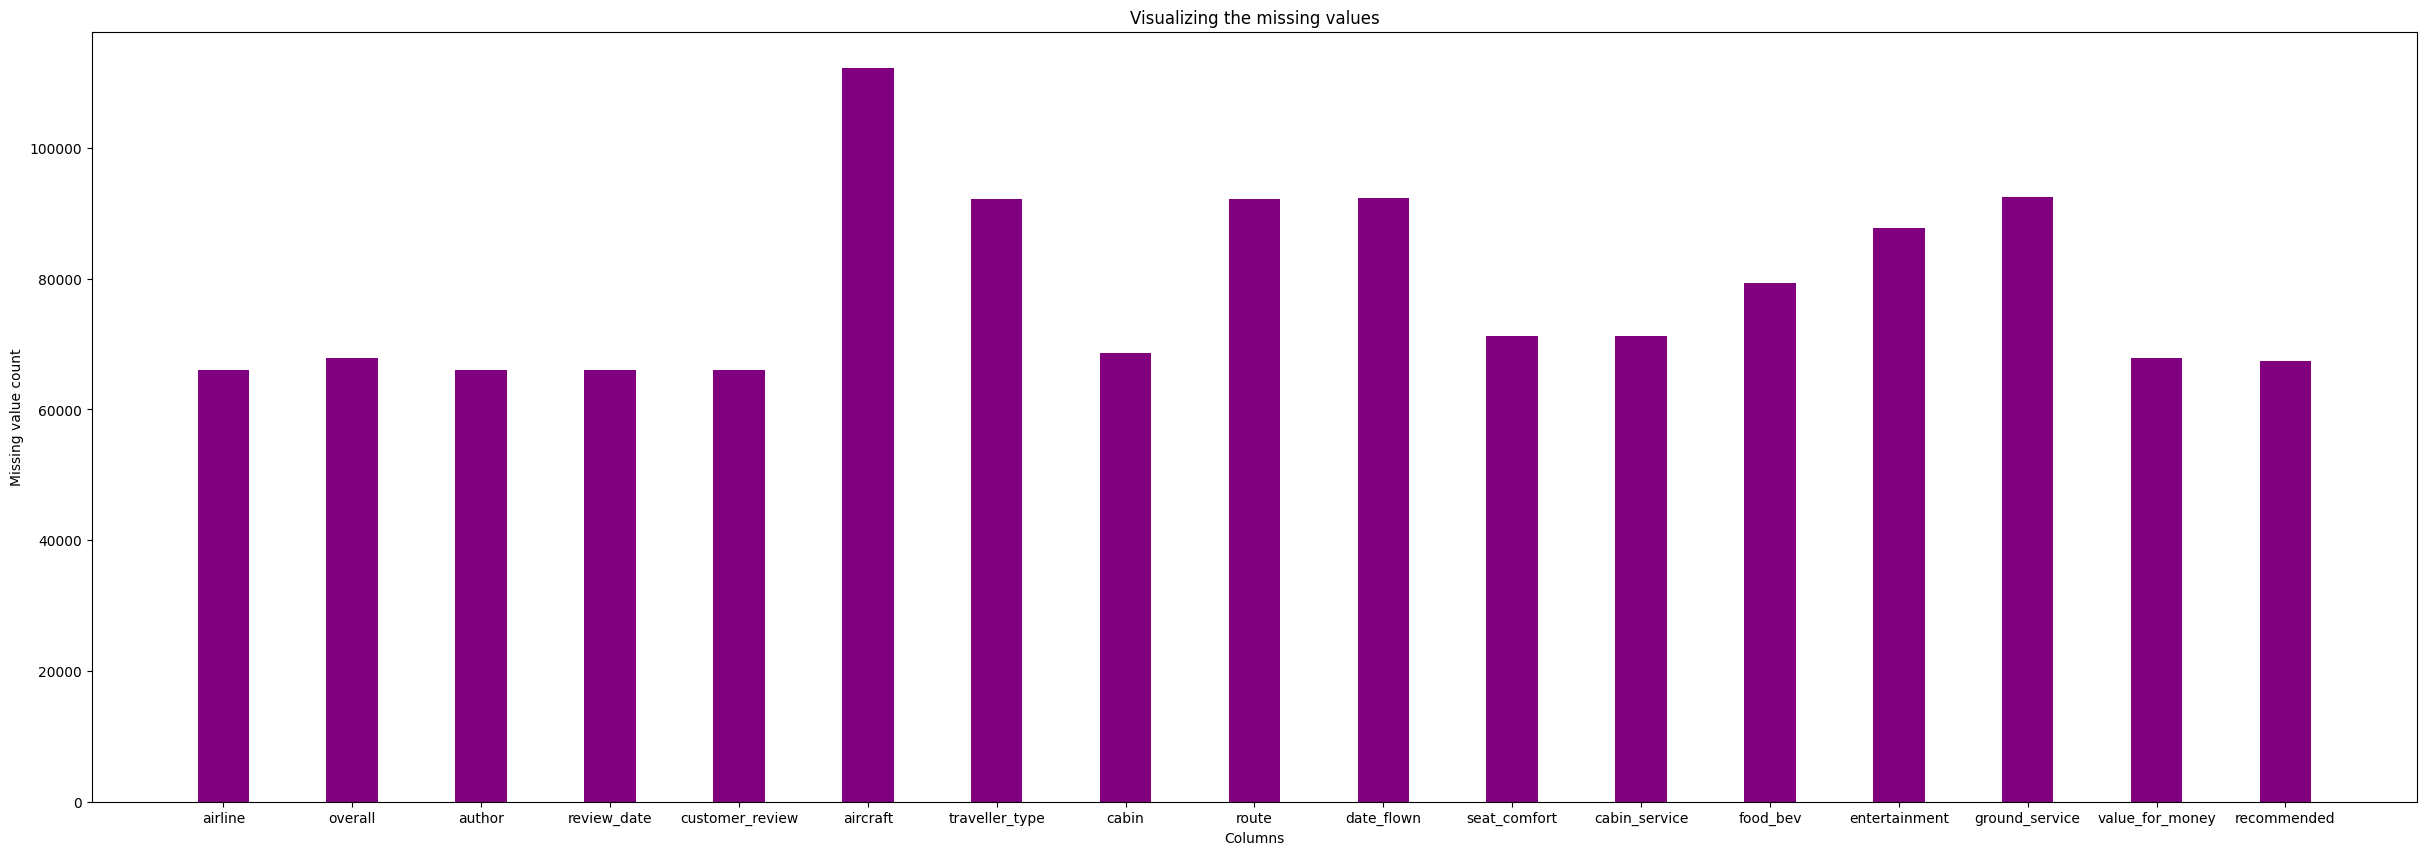

In [8]:
# Visualizing the missing values
courses = list(df.columns)
values = list(df.isnull().sum())
fig = plt.figure(figsize = (30, 10))
plt.bar(courses, values, color ='purple',
        width = 0.4)
plt.xlabel("Columns")
plt.ylabel("Missing value count")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

The dataset has around 131895 rows and 17 columns. The data is in such form that after each row there is a blank row. Apart from that there many NaN values in each variable and there might be duplicate rows. We need to clean this data in order to make it ready for Exploratory Data Analysis.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

overall  seat_comfort  cabin_service      food_bev  entertainment  \
count  64017.000000  60681.000000   60715.000000  52608.000000   44193.000000   
mean       5.145430      2.952160       3.191814      2.908170       2.863372   
std        3.477532      1.441362       1.565789      1.481893       1.507262   
min        1.000000      1.000000       1.000000      1.000000       1.000000   
25%        1.000000      1.000000       2.000000      1.000000       1.000000   
50%        5.000000      3.000000       3.000000      3.000000       3.000000   
75%        9.000000      4.000000       5.000000      4.000000       4.000000   
max       10.000000      5.000000       5.000000      5.000000       5.000000   

       ground_service  value_for_money  
count    39358.000000     63975.000000  
mean         2.692820         2.943962  
std          1.612215         1.587370  
min          1.000000         1.000000  
25%          1.000000         1.000000  
50%          3.000000         3.000000  
75%          4.000000         4.000000  
max          5.000000         5.000000

### Variables Description 


1.  **airline:** Name of the airline.
2.  **overall:** Overall points are given to the trip between 0 & 10.
3.  **author:** Author of the trip
4.  **review_date:** Date of the Review 
5.  **customer_review:** Reviews given by customers about the flight experience.
6.  **aircraft:** Type of the aircraft
7.  **traveller_type:** Type of traveler (e.g. business, leisure) 
8.  **cabin:** Cabin type (e.g. Economy Class, Business Class, Premium Economy or First Class)
9.  **route:** The travel from and to destination of the customer.
10. **date_flown:** Date of the flight
11. **seat_comfort:** Rated between 1-5
12. **cabin_service:** Rated between 1-5
13. **food_bev:** Rated between 1-5 
14. **entertainment:** Rated between 1-5
15. **ground_service:** Rated between 1-5
16. **value_for_money:** Rated between 1-5
17. **recommended:** Referred to friend(Yes or No)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Make Dataset ready for EDA
df.duplicated().sum()

70711

In [12]:
#droping the null values
df.drop_duplicates(inplace = True)

In [13]:
df.drop([0])

airline  overall               author  \
1            Turkish Airlines      7.0  Christopher Hackley   
3            Turkish Airlines      2.0        Adriana Pisoi   
5            Turkish Airlines      3.0            M Galerko   
7            Turkish Airlines     10.0          Zeshan Shah   
9            Turkish Airlines      1.0           Pooja Jain   
...                       ...      ...                  ...   
131886  Ukraine International      NaN  Yevheniy Kahanovych   
131888  Ukraine International      NaN            Helen Lee   
131890  Ukraine International      NaN     Andriy Yesypenko   
131892  Ukraine International      NaN    Volodya Bilotkach   
131894  Ukraine International      NaN      Kasper Hettinga   

               review_date                                    customer_review  \
1             8th May 2019  âœ… Trip Verified | London to Izmir via Istanb...   
3             7th May 2019  âœ… Trip Verified | Istanbul to Bucharest. We ...   
5             7th May 2019  âœ… Trip Verified | Rome to Prishtina via Ista...   
7             6th May 2019  âœ… Trip Verified | Flew on Turkish Airlines I...   
9             6th May 2019  âœ… Trip Verified | Mumbai to Dublin via Istan...   
...                    ...                                                ...   
131886   21st January 2007  Two domestic flights between Kiev and Lviv las...   
131888  15th December 2006  I had a good flight from London to Kiev with U...   
131890       19th May 2006  Kiev - London (Gatwick) in business class (in ...   
131892     29th April 2006  Several flights - KBP to AMS (3 times one way)...   
131894  10th February 2006  KBP-AMS with UIA. Although it was a relatively...   

       aircraft  traveller_type          cabin  \
1           NaN        Business  Economy Class   
3           NaN  Family Leisure  Economy Class   
5           NaN        Business  Economy Class   
7          A330    Solo Leisure  Economy Class   
9           NaN    Solo Leisure  Economy Class   
...         ...             ...            ...   
131886      NaN             NaN            NaN   
131888      NaN             NaN            NaN   
131890      NaN             NaN            NaN   
131892      NaN             NaN            NaN   
131894      NaN             NaN            NaN   

                                 route           date_flown  seat_comfort  \
1         London to Izmir via Istanbul  2019-05-01 00:00:00           4.0   
3                Istanbul to Bucharest  2019-05-01 00:00:00           4.0   
5       Rome to Prishtina via Istanbul  2019-05-01 00:00:00           1.0   
7         Washington Dulles to Karachi           April 2019           4.0   
9        Mumbai to Dublin via Istanbul  2019-05-01 00:00:00           1.0   
...                                ...                  ...           ...   
131886                             NaN                  NaN           NaN   
131888                             NaN                  NaN           NaN   
131890                             NaN                  NaN           NaN   
131892                             NaN                  NaN           NaN   
131894                             NaN                  NaN           NaN   

        cabin_service  food_bev  entertainment  ground_service  \
1                 5.0       4.0            4.0             2.0   
3                 1.0       1.0            1.0             1.0   
5                 4.0       1.0            3.0             1.0   
7                 5.0       5.0            5.0             5.0   
9                 1.0       1.0            1.0             1.0   
...               ...       ...            ...             ...   
131886            NaN       NaN            NaN             NaN   
131888            NaN       NaN            NaN             NaN   
131890            NaN       NaN            NaN             NaN   
131892            NaN       NaN            NaN             NaN   
131894            NaN       NaN         

In [14]:
df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [15]:
# Unique value counts for each variable
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

airline: 81
overall: 10
author: 44069
review_date: 3015
customer_review: 61172
aircraft: 2088
traveller_type: 4
cabin: 4
route: 24549
date_flown: 63
seat_comfort: 5
cabin_service: 5
food_bev: 5
entertainment: 5
ground_service: 5
value_for_money: 5
recommended: 2


In [16]:
# Dropping unwanted columns
df.drop(columns=['aircraft','route','author','customer_review'],axis=1,inplace=True)

### What all manipulations have you done and insights you found?

The data manipulation involved the removal of duplicates to ensure the data is clean and unique. The blank rows were dropped to avoid missing values that could interfere with data analysis. And finally the unwanted columns were dropped. Following are the reasons for dropping these columns:

1. aircraft - It has 42695 NaN values which is around 70% of all values.
2. route - It has 24549 unique values which is around 40% of all values.
3. author - It has 44069 unique values which is around 72% of all values.
4. customer_review - It has 61172 unique values which is around 99% of all values.

Columns with high number of NaN and unique values are very difficult for Exploratory Data Analysis. High percentage of missing values may not be useful for analysis because they lack sufficient data to draw conclusions from. Imputing or filling in missing values can be problematic and lead to biased results. High number of unique values may not provide meaningful insights or patterns. So dropping these types of columns is the best option.

In [17]:
df.head()

airline  overall   review_date  traveller_type          cabin  \
0               NaN      NaN           NaN             NaN            NaN   
1  Turkish Airlines      7.0  8th May 2019        Business  Economy Class   
3  Turkish Airlines      2.0  7th May 2019  Family Leisure  Economy Class   
5  Turkish Airlines      3.0  7th May 2019        Business  Economy Class   
7  Turkish Airlines     10.0  6th May 2019    Solo Leisure  Economy Class   

            date_flown  seat_comfort  cabin_service  food_bev  entertainment  \
0                  NaN           NaN            NaN       NaN            NaN   
1  2019-05-01 00:00:00           4.0            5.0       4.0            4.0   
3  2019-05-01 00:00:00           4.0            1.0       1.0            1.0   
5  2019-05-01 00:00:00           1.0            4.0       1.0            3.0   
7           April 2019           4.0            5.0       5.0            5.0   

   ground_service  value_for_money recommended  
0             NaN              NaN         NaN  
1             2.0              4.0         yes  
3             1.0              1.0          no  
5             1.0              2.0          no  
7             5.0              5.0         yes

In [18]:
df.shape

(61184, 13)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [19]:
top_10_airlines = df['airline'].value_counts().head(10)
top_10_airlines = top_10_airlines.reset_index()
top_10_airlines.columns = ['airline', 'count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Spirit Airlines'),
  Text(1, 0, 'American Airlines'),
  Text(2, 0, 'United Airlines'),
  Text(3, 0, 'British Airways'),
  Text(4, 0, 'Emirates'),
  Text(5, 0, 'China Southern Airlines'),
  Text(6, 0, 'Frontier Airlines'),
  Text(7, 0, 'Ryanair'),
  Text(8, 0, 'Delta Air Lines'),
  Text(9, 0, 'Turkish Airlines')])

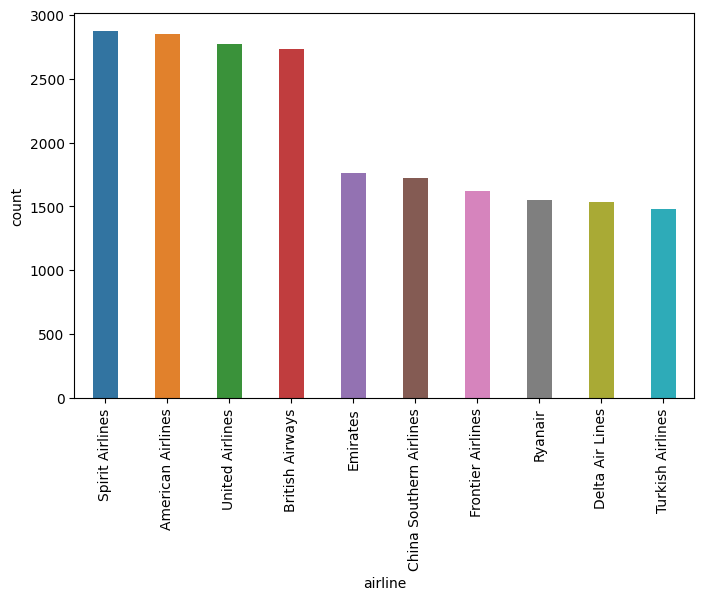

In [20]:
# Chart - 1 visualization code
plt.subplots(figsize=(8, 5))
sns.barplot(x='airline', y='count', data=top_10_airlines, width = 0.4)
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 2

In [21]:
df['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

<Axes: xlabel='recommended', ylabel='count'>

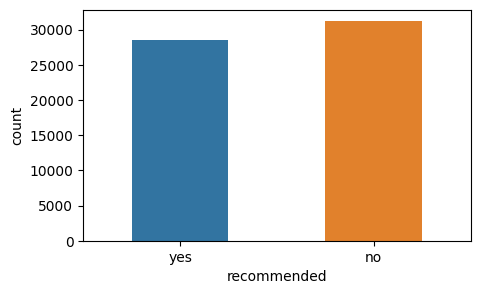

In [22]:
# Chart - 2 visualization code
plt.subplots(figsize=(5, 3))
sns.countplot(x='recommended', data=df, width = 0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 3

In [23]:
df['traveller_type'].value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

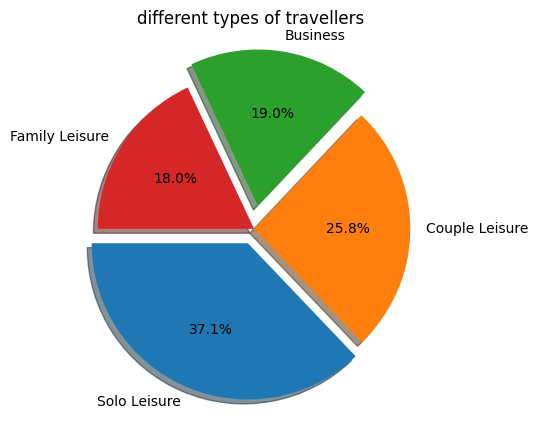

In [24]:
# Chart - 3 visualization code
labels = 'Solo Leisure' , 'Couple Leisure' , 'Business' , 'Family Leisure'
sizes = df.traveller_type.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("different types of travellers")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 4

<Axes: xlabel='traveller_type', ylabel='count'>

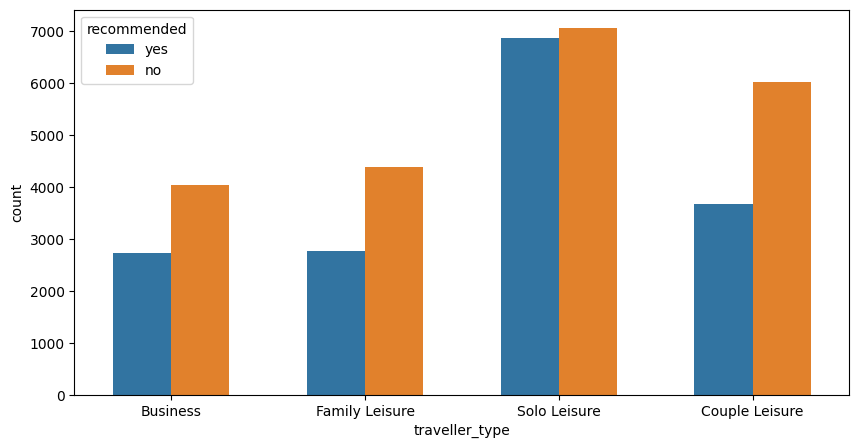

In [25]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=df['traveller_type'],hue=df['recommended'], width = 0.6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 5

In [26]:
df['cabin'].value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

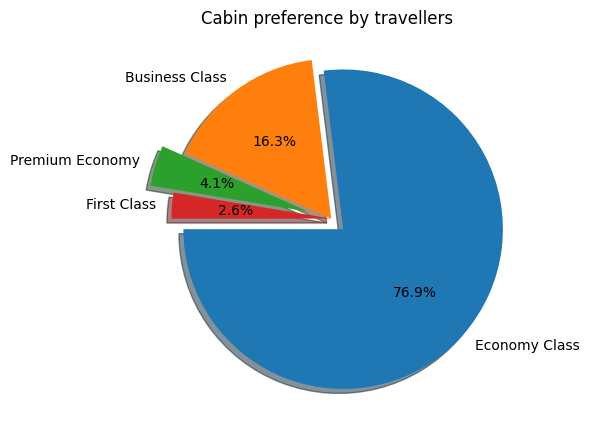

In [27]:
# Chart - 5 visualization code
labels = 'Economy Class' , 'Business Class' , 'Premium Economy' , 'First Class'
sizes = df.cabin.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("Cabin preference by travellers")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 6

<Axes: xlabel='cabin', ylabel='count'>

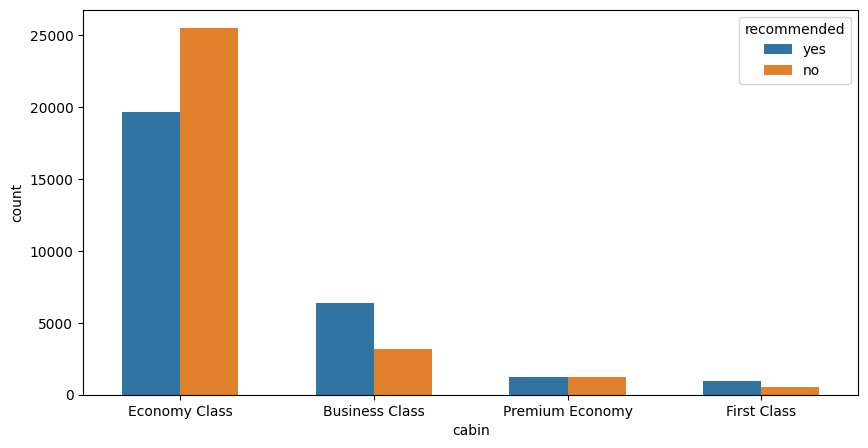

In [28]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x=df['cabin'],hue=df['recommended'], width = 0.6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 7

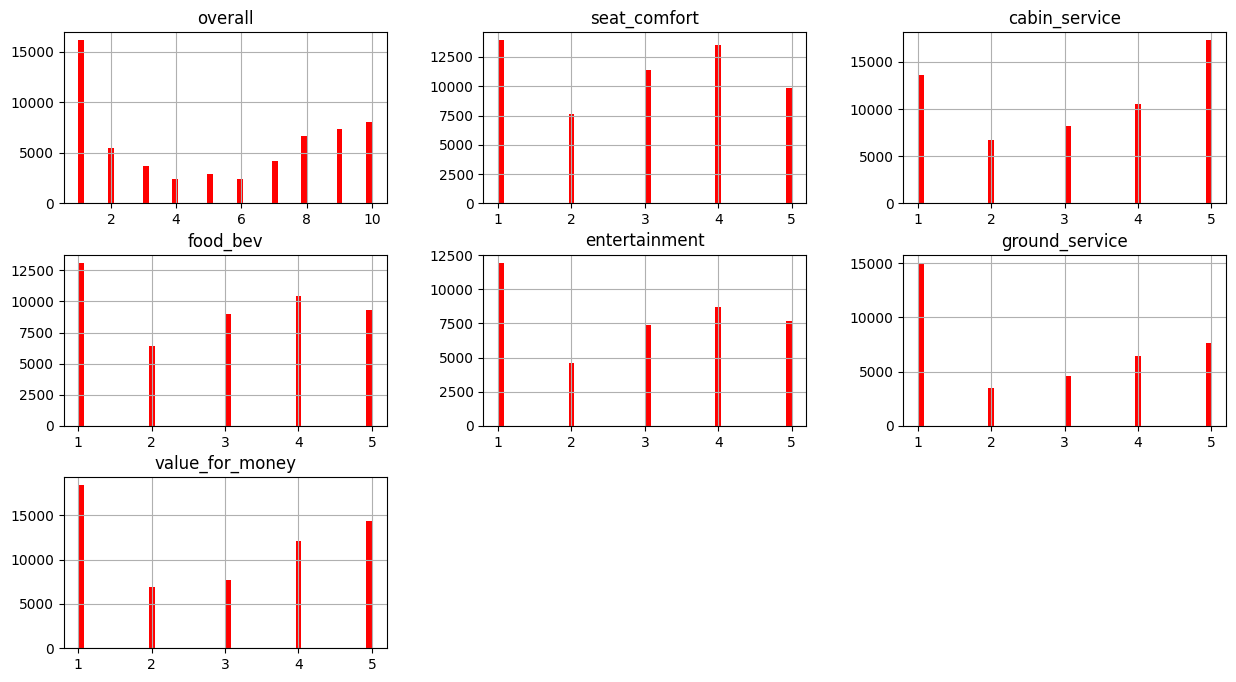

In [29]:
# Chart - 7 visualization code
df.hist(bins=50, figsize=(15,8),color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 8 - Pair Plot 

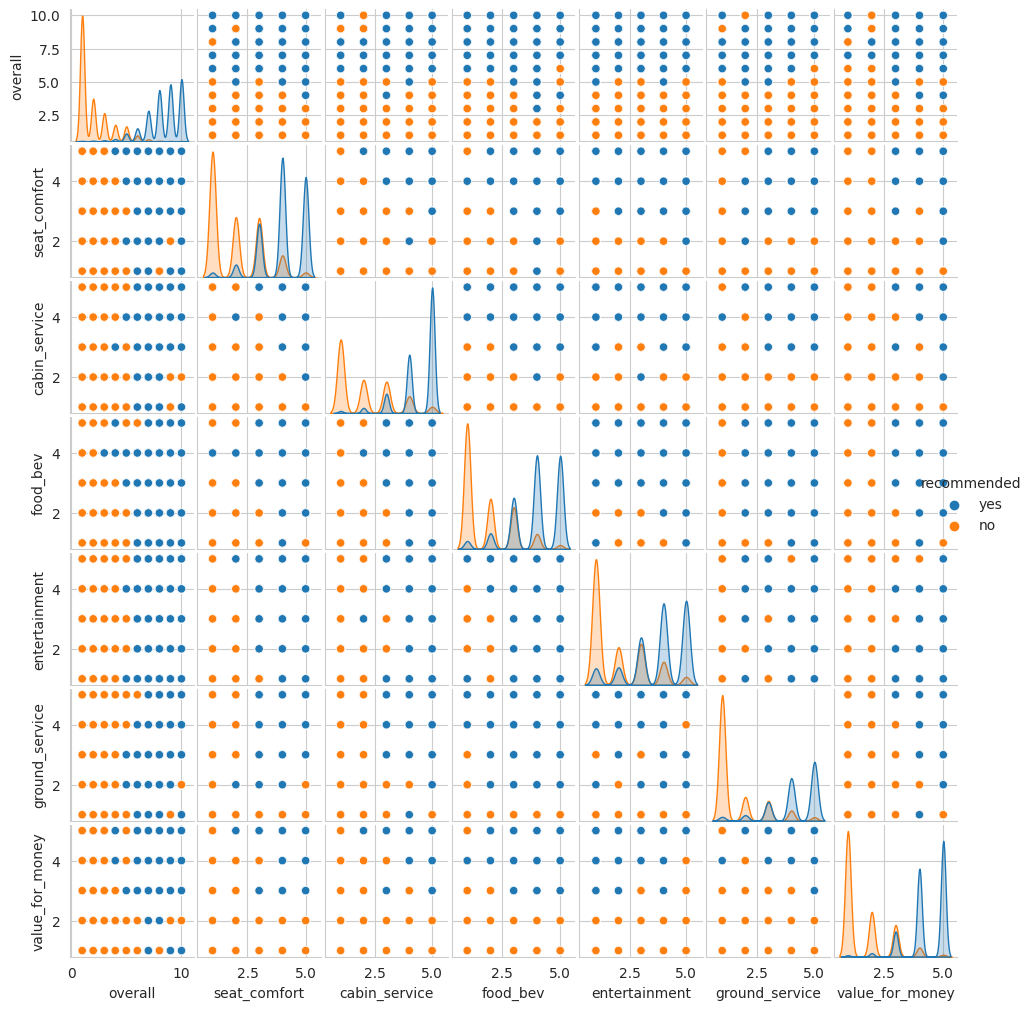

In [30]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : True})
pp=sns.pairplot(df,hue='recommended')
pp.fig.set_size_inches(10,10);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 9 - Correlation Heatmap

<Axes: >

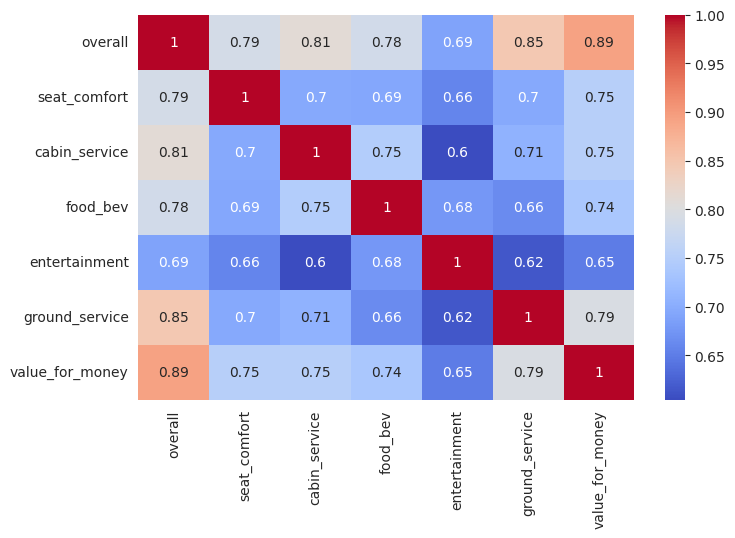

In [31]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 10

<Axes: xlabel='cabin', ylabel='overall'>

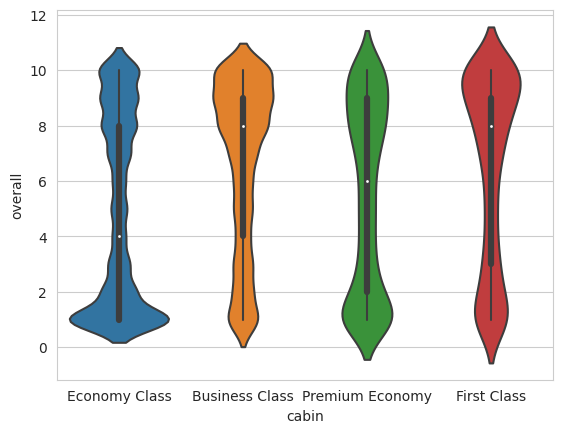

In [32]:
# Chart - 10 visualization code
sns.violinplot(x="cabin", y="overall",hue=None, data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 11

<Axes: xlabel='traveller_type', ylabel='overall'>

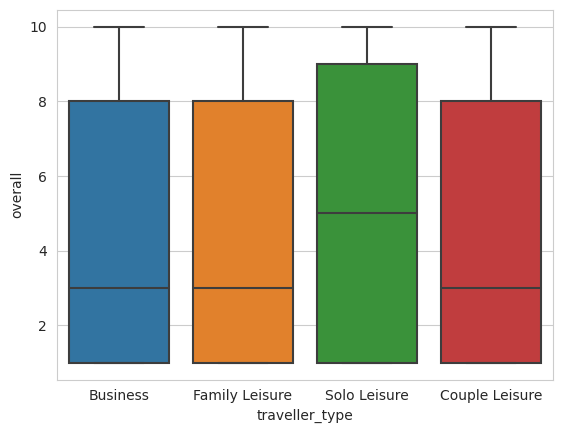

In [33]:
# Chart - 11 visualization code
sns.boxplot(x="traveller_type", y="overall", data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 12

In [34]:
# Chart - 12 visualization code
df['date_flown']=pd.to_datetime(df['date_flown'])
df['Year'] = df['date_flown'].apply(lambda x: x.year)
df['Month'] = df['date_flown'].apply(lambda x: x.month)
df['Day'] = df['date_flown'].apply(lambda x: x.day)

In [35]:
data_by_year = df.groupby('Year')['airline'].count()

<Axes: xlabel='Year'>

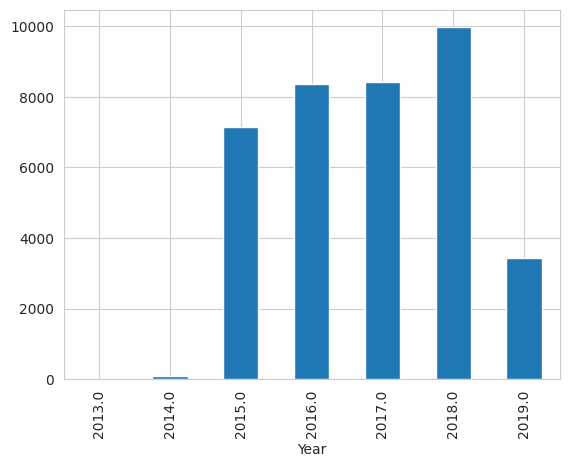

In [36]:
data_by_year.plot(kind='bar')

<Axes: xlabel='Month'>

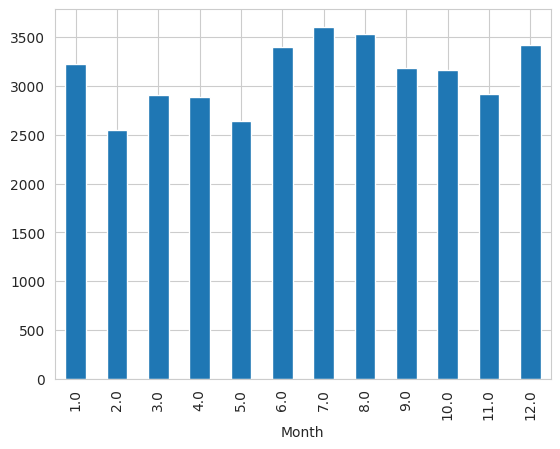

In [38]:
data_by_month = df.groupby('Month')['airline'].count()
data_by_month.plot(kind='bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 13

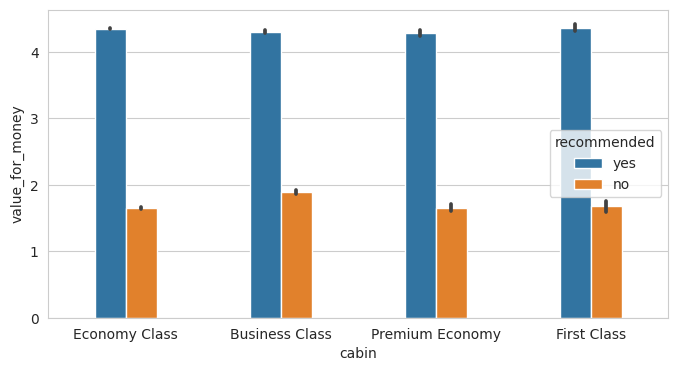

In [39]:
# Chart - 13 visualization code
plt.figure(figsize=(8,4))
cabin_ = sns.barplot(x=df['cabin'],y=df['value_for_money'], hue=df['recommended'], width = 0.4)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 14

In [ ]:
# Chart - 14 visualization code


In [40]:
# Features present in dataset
features= df.columns
features

Index(['airline', 'overall', 'review_date', 'traveller_type', 'cabin',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended',
       'Year', 'Month', 'Day'],
      dtype='object')

In [41]:
features_1= features.drop(['airline','review_date'])

overall


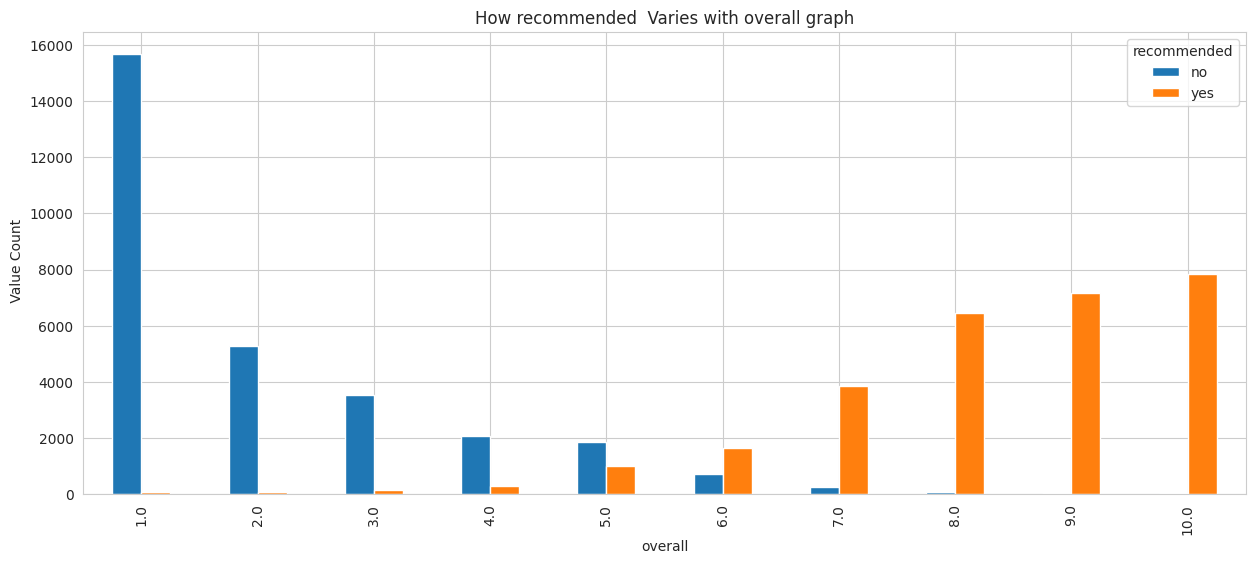

traveller_type


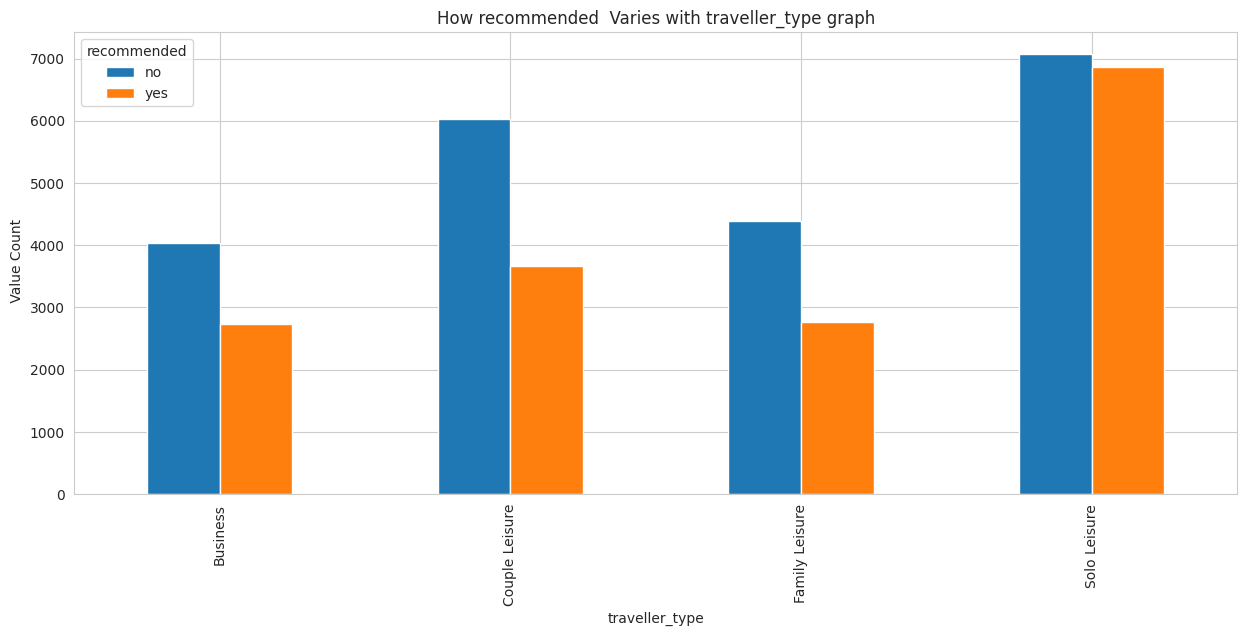

cabin


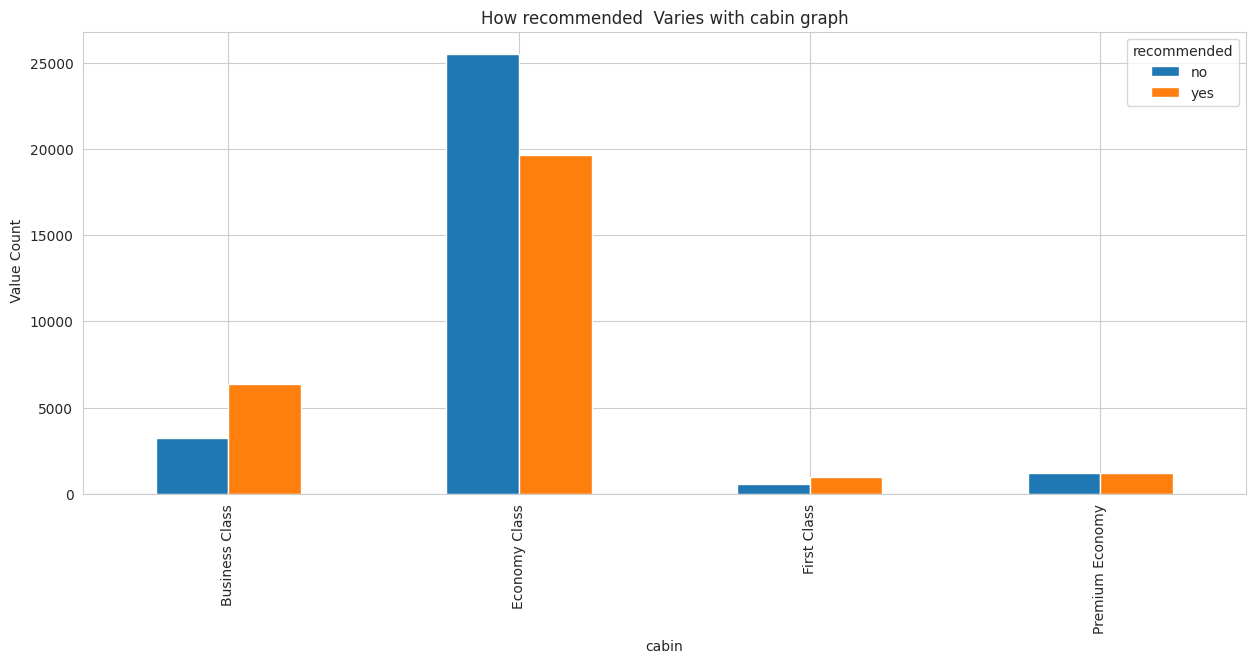

date_flown


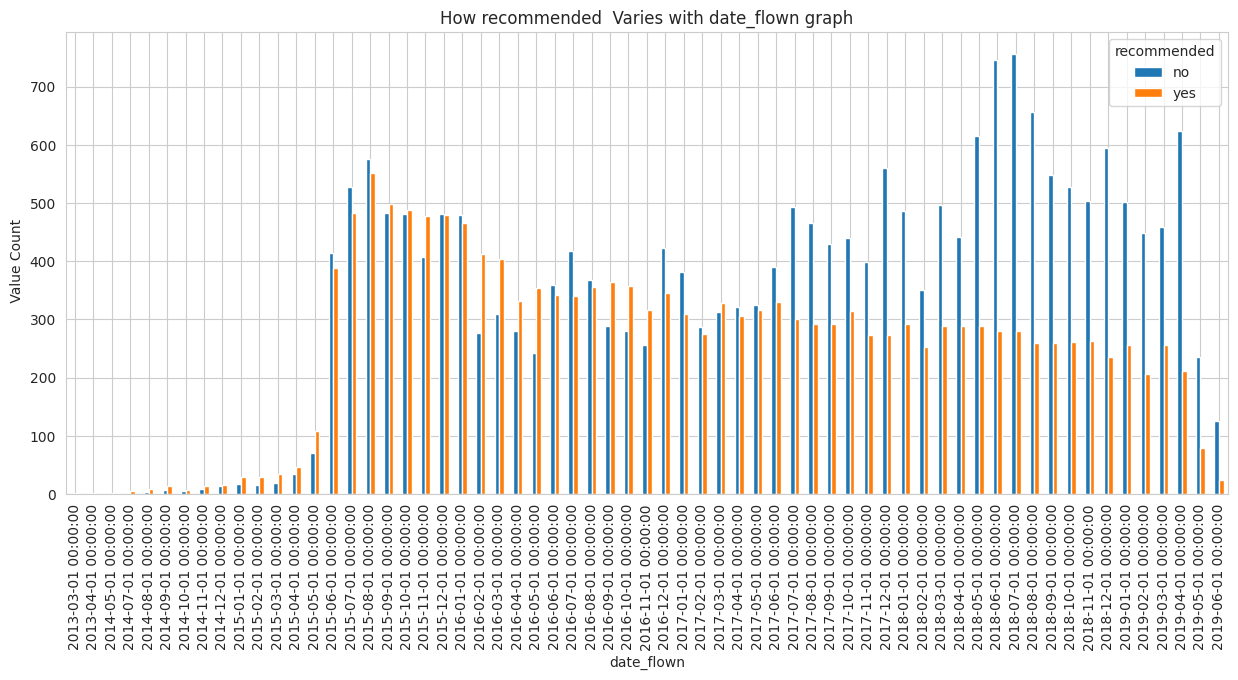

seat_comfort


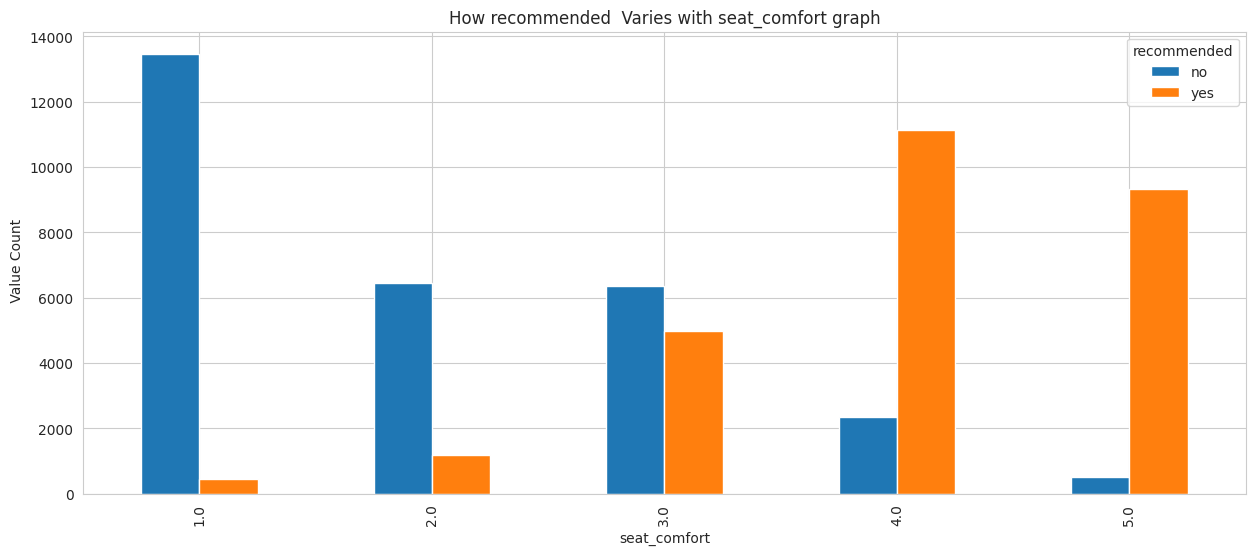

cabin_service


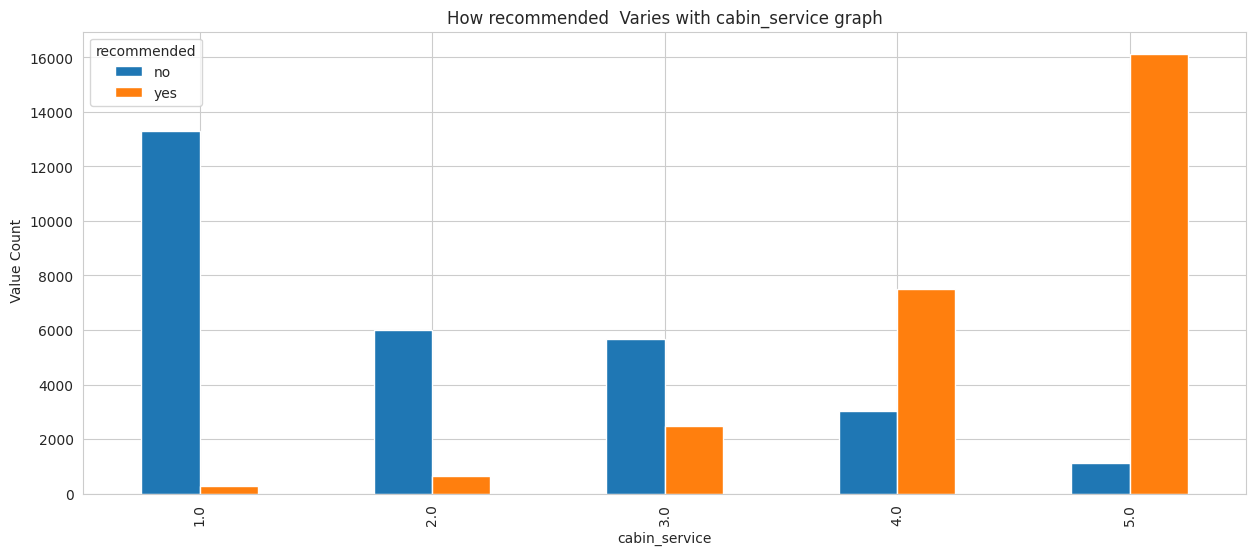

food_bev


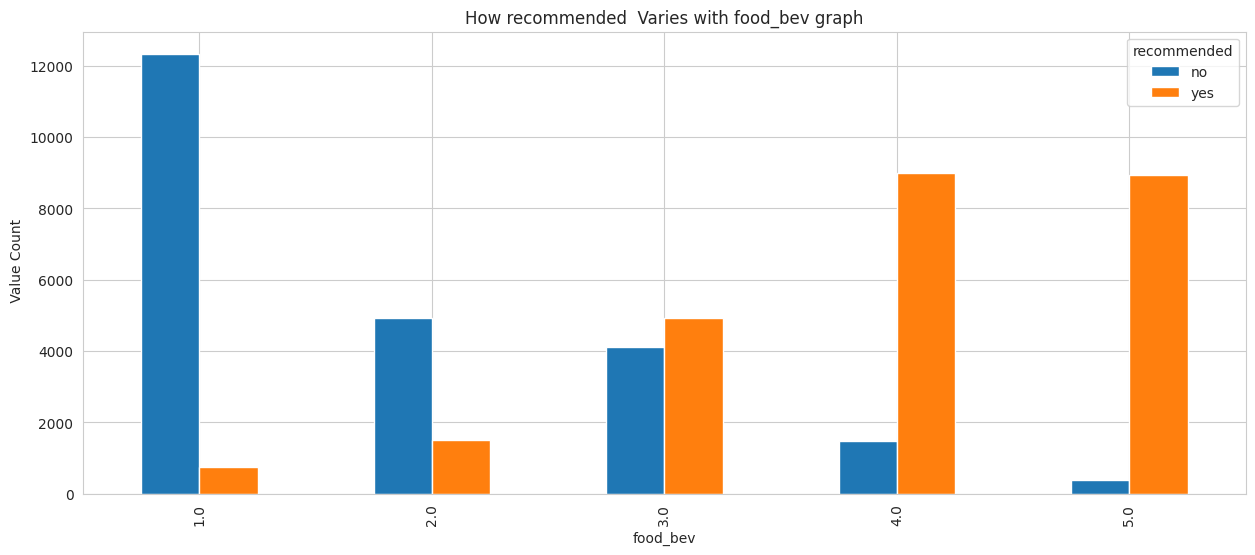

entertainment


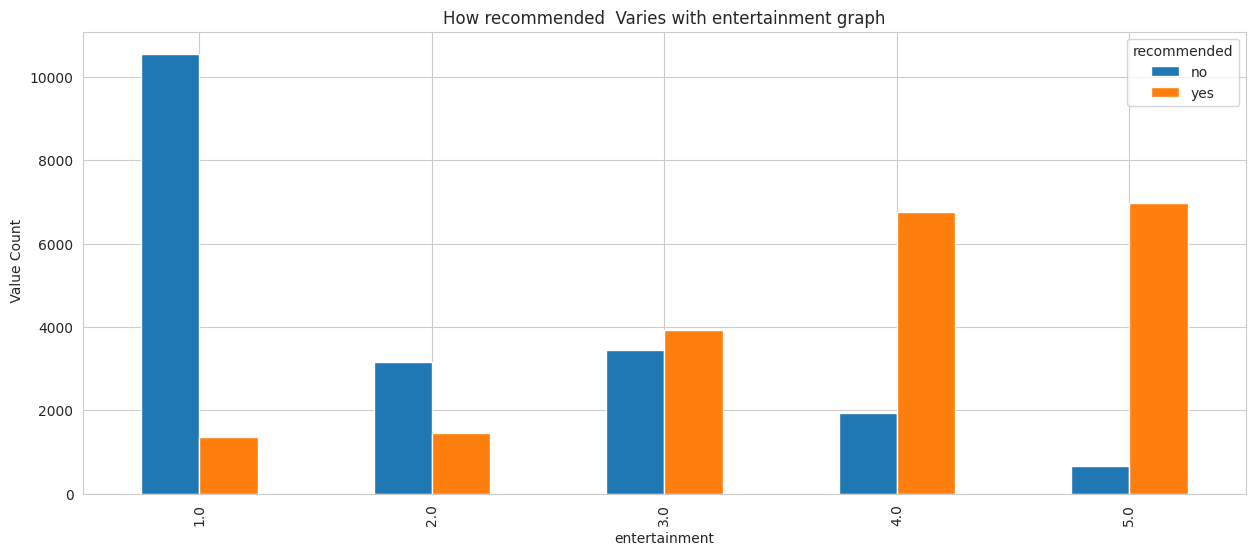

ground_service


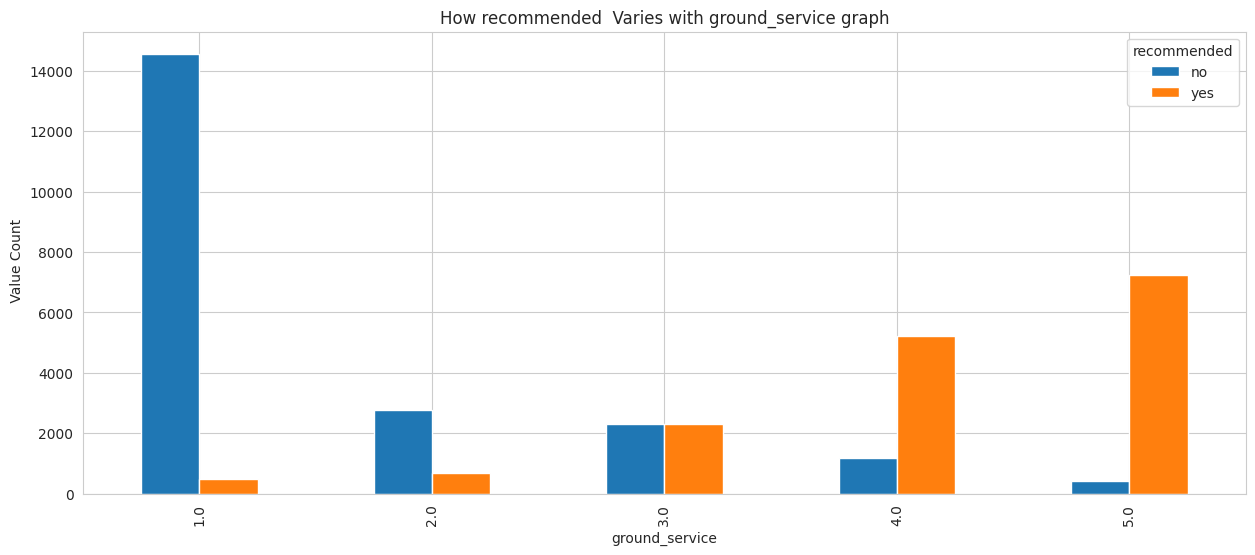

value_for_money


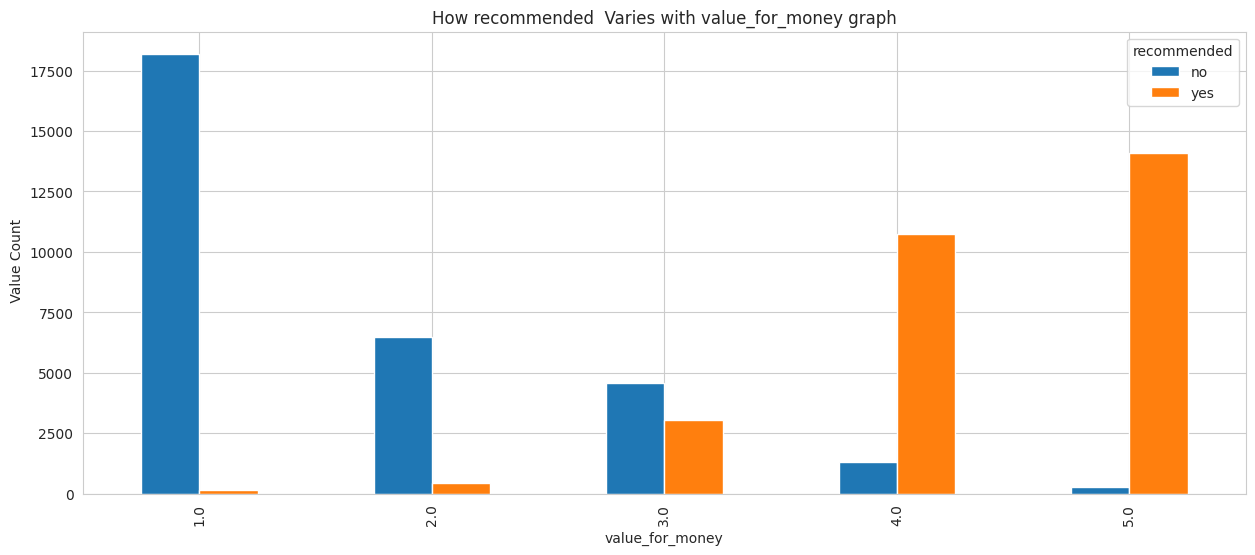

recommended


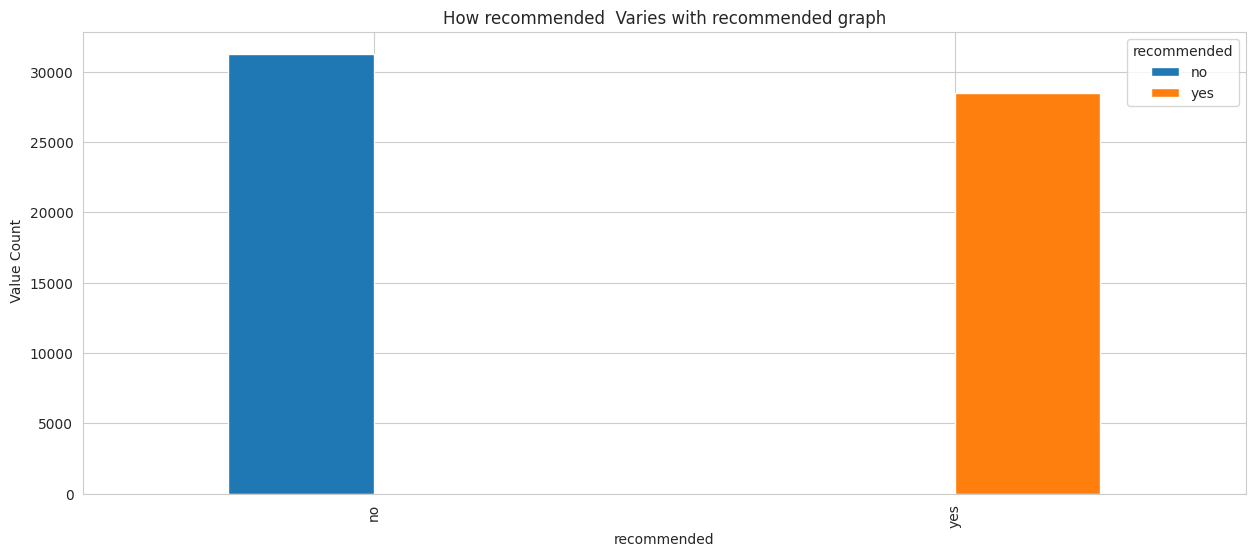

Year


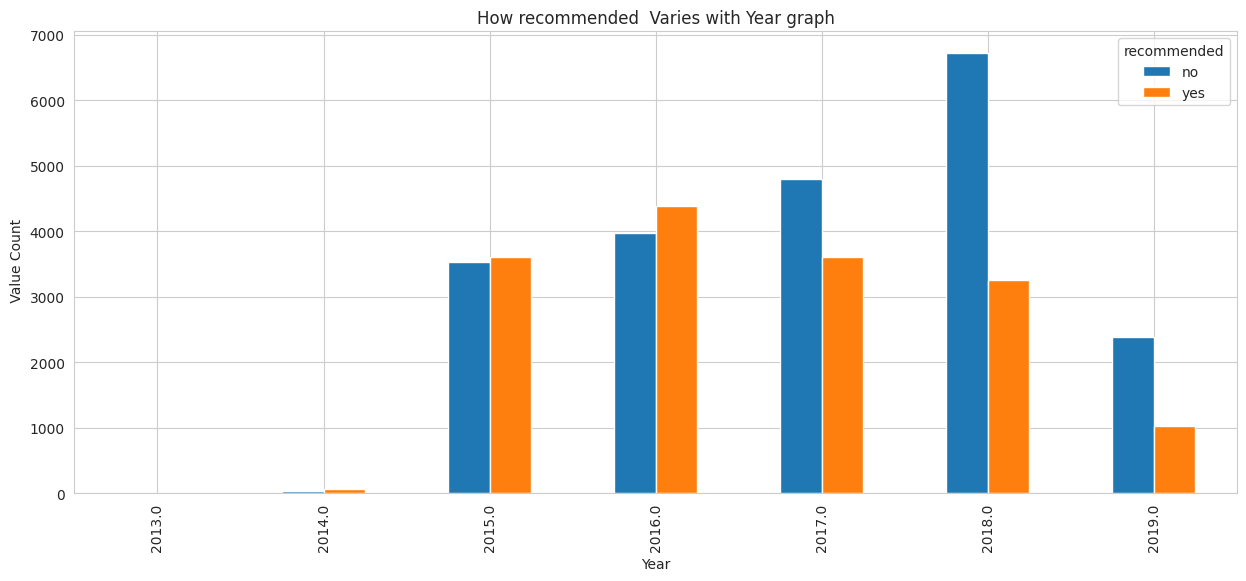

Month


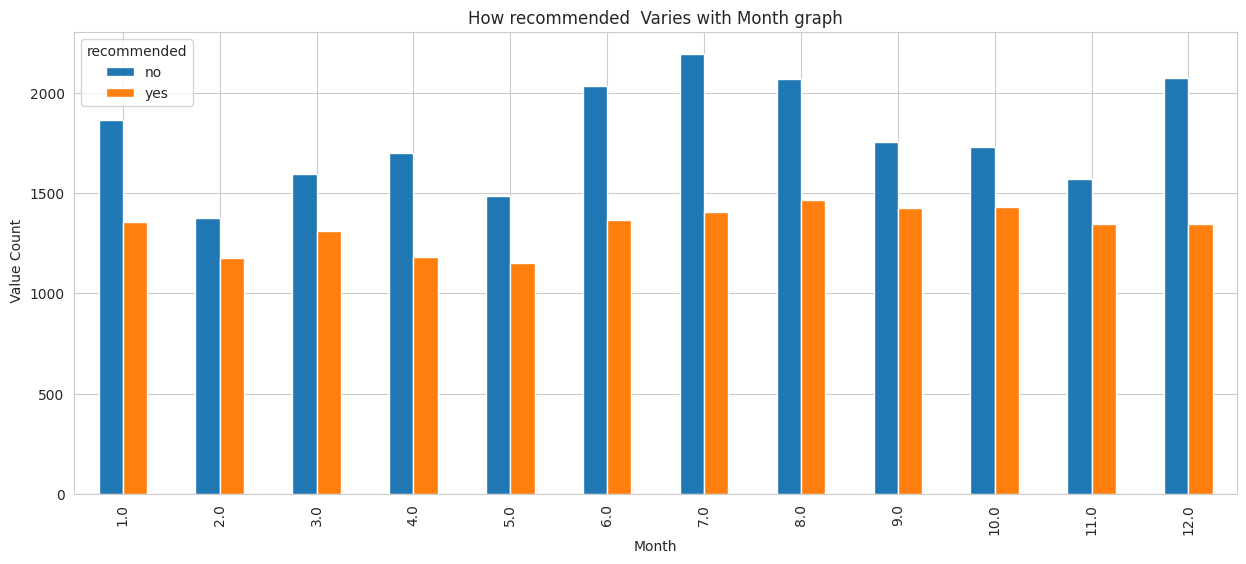

Day


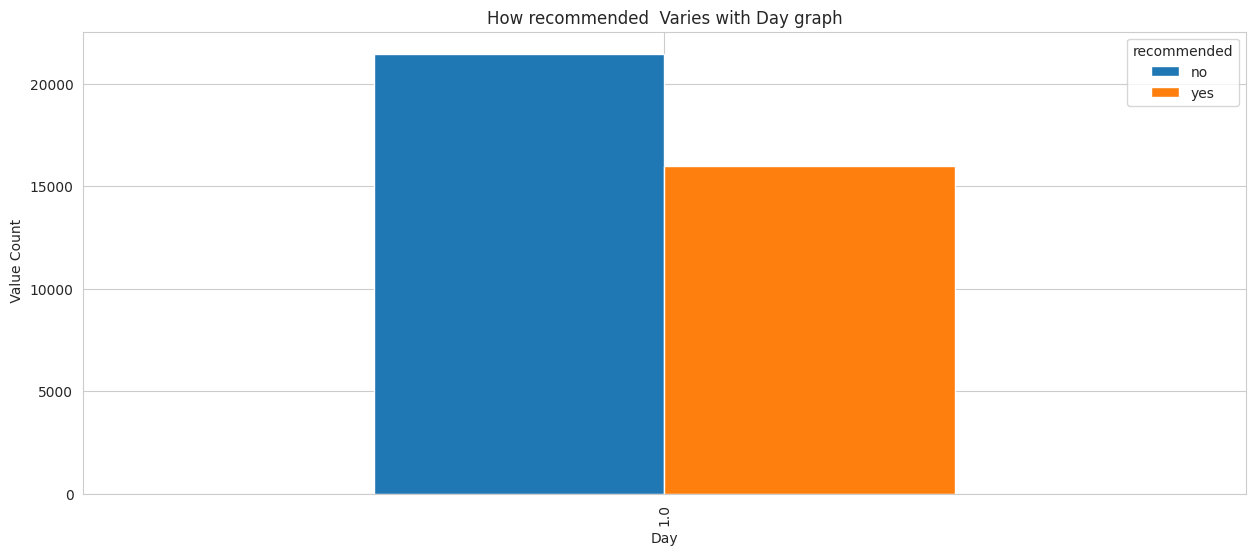

In [42]:
# Ploting graph of count of feature grouped by target variable 
for feature in features_1:
  print(feature)
  df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We can conclude following things from above:

1. We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
2. Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastrure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.
3. From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.
4. From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.
5. In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same. Also we can see seat of class 1 have been given highest negative recommendation as compare to its positive recommendation. Here we come to a conclusion it must be removed as early as possible.
6. In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
7. In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.
8. In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows that airline has to improve their entertainment system as well.
9. In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows that airline has to improve their ground service.
10. In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows that airline has to make their flight service more cost effective.

#### Chart - 15

In [ ]:
# Chart - 15 visualization code


overall


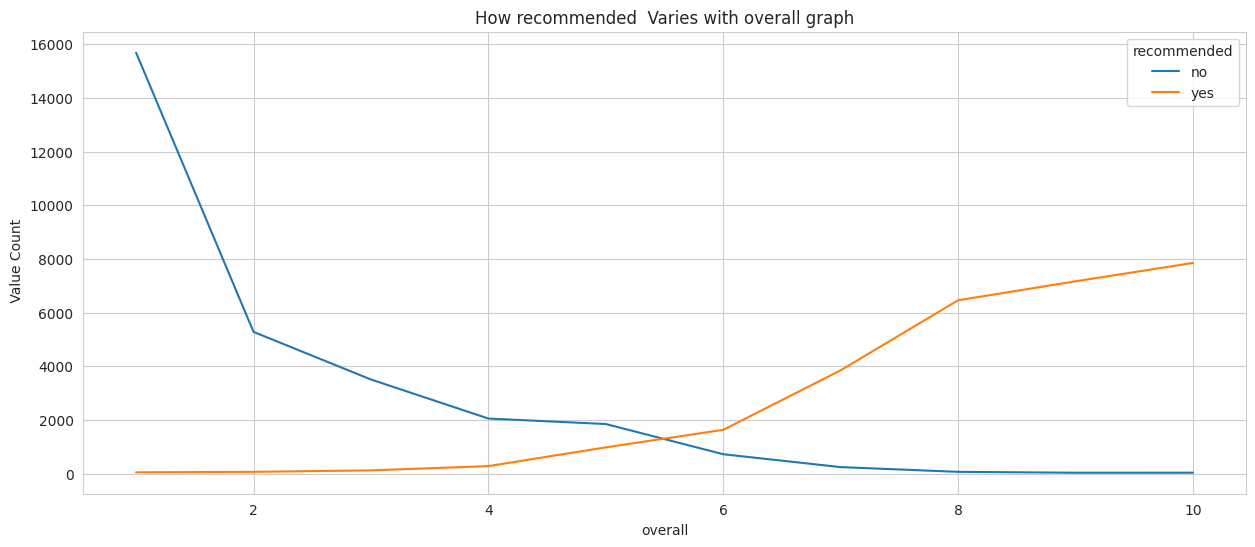

traveller_type


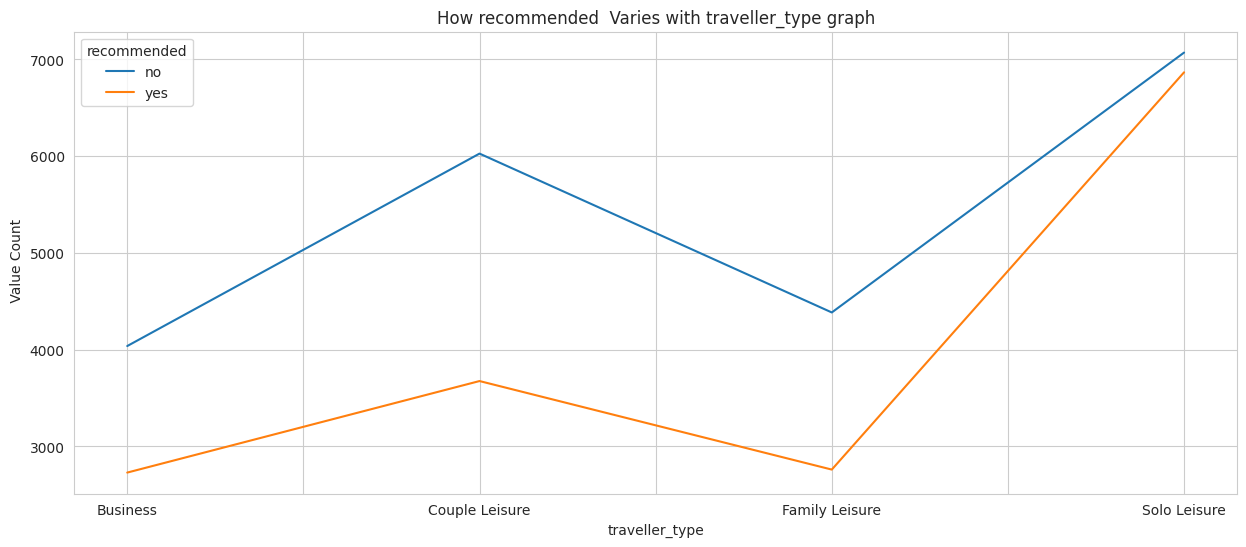

cabin


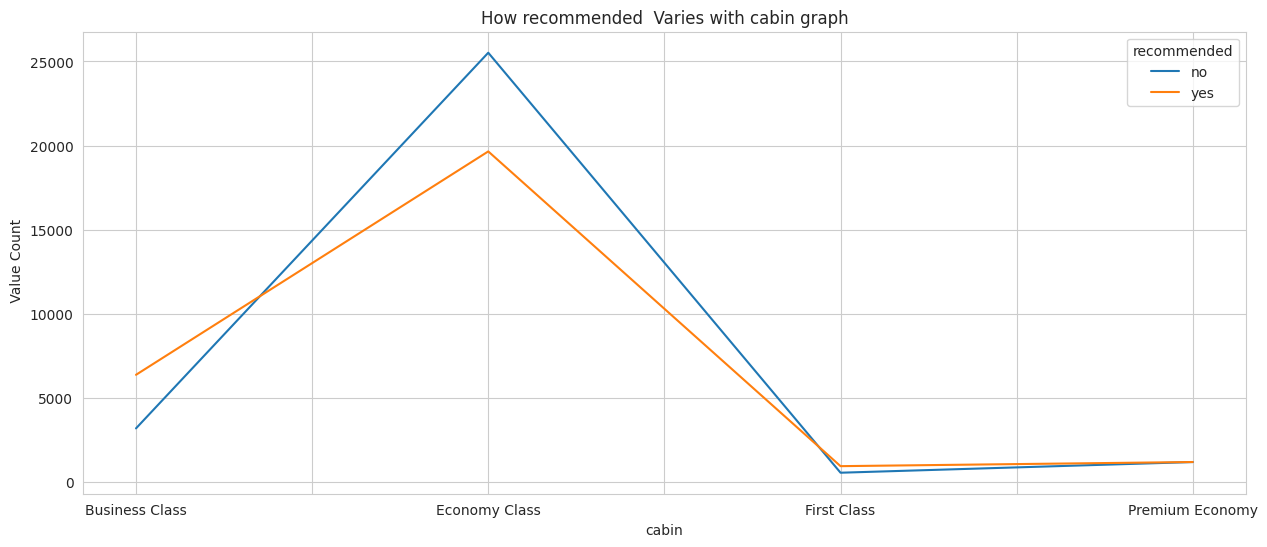

date_flown


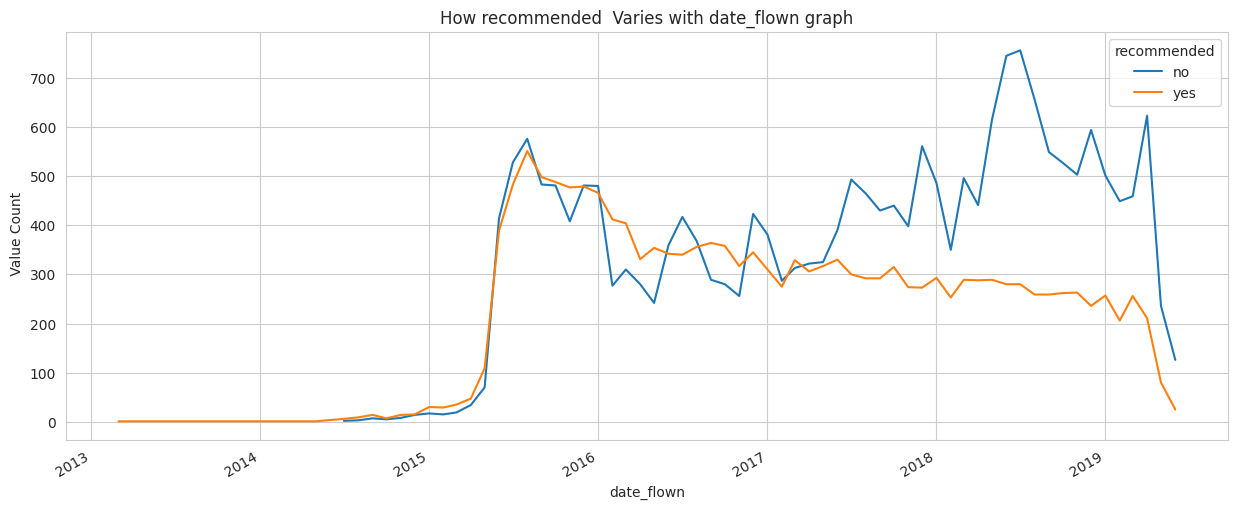

seat_comfort


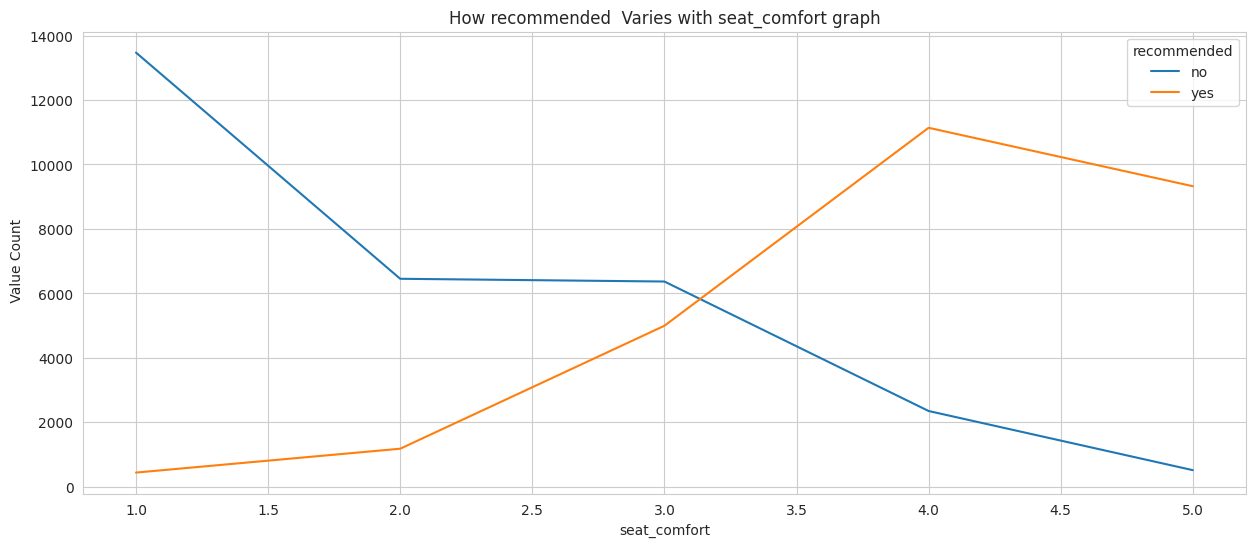

cabin_service


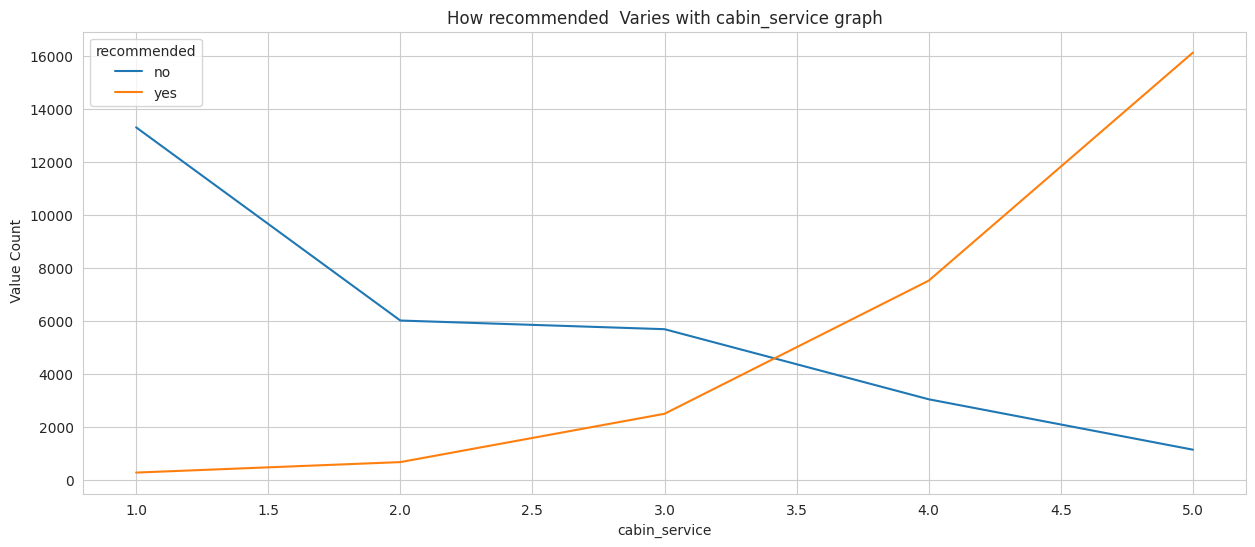

food_bev


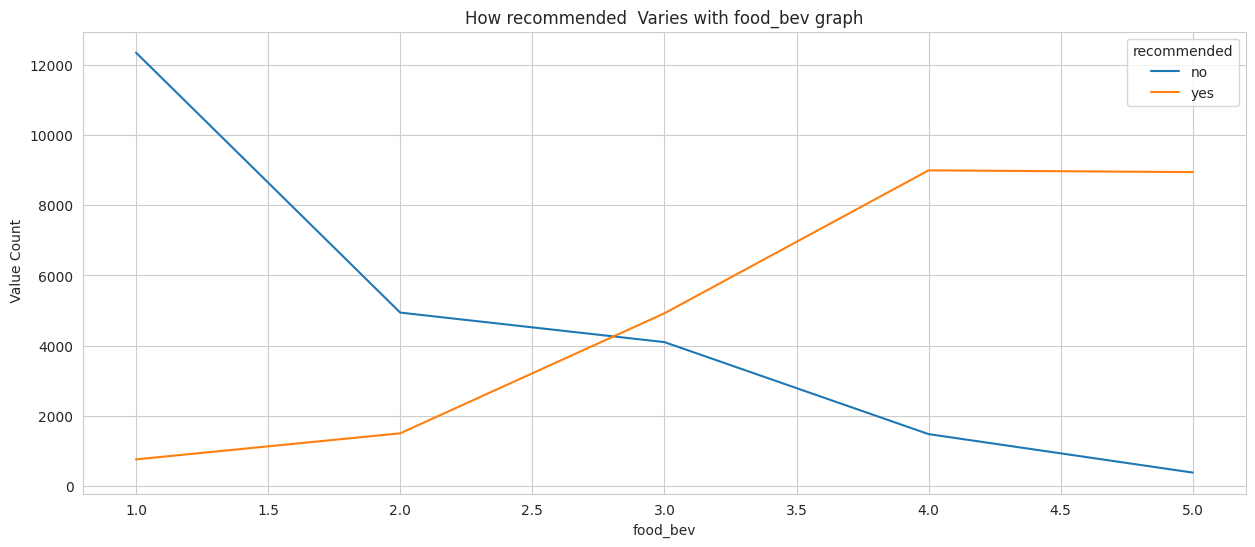

entertainment


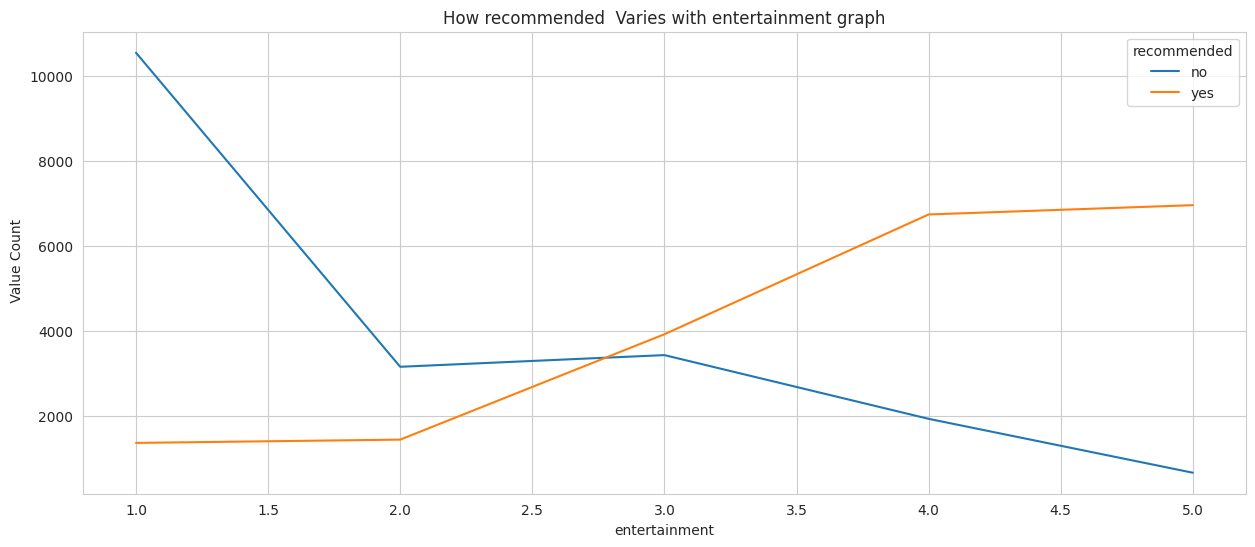

ground_service


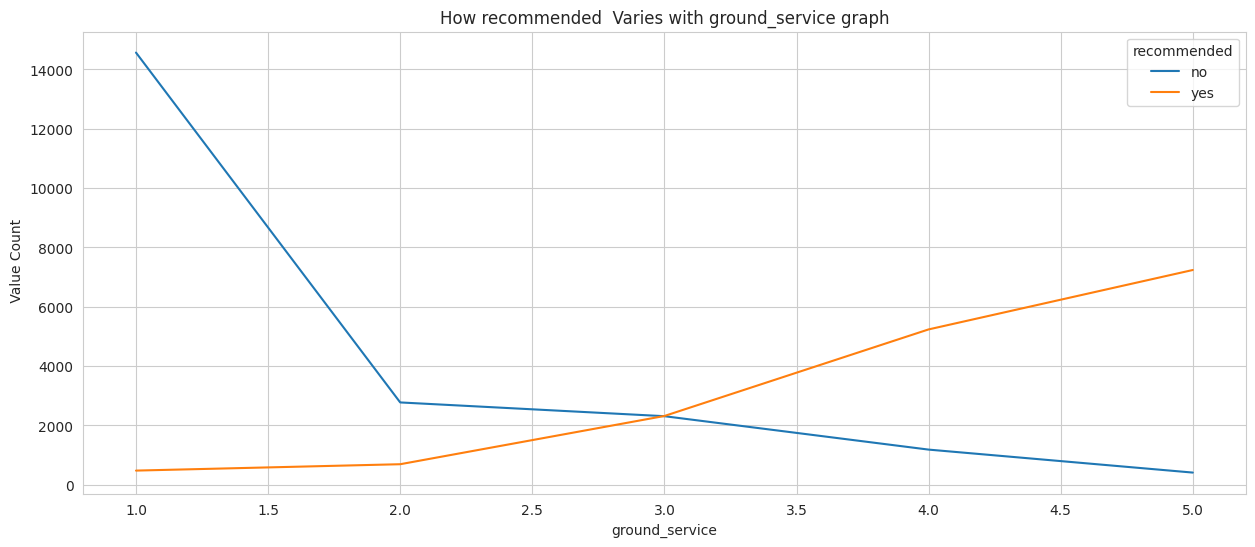

value_for_money


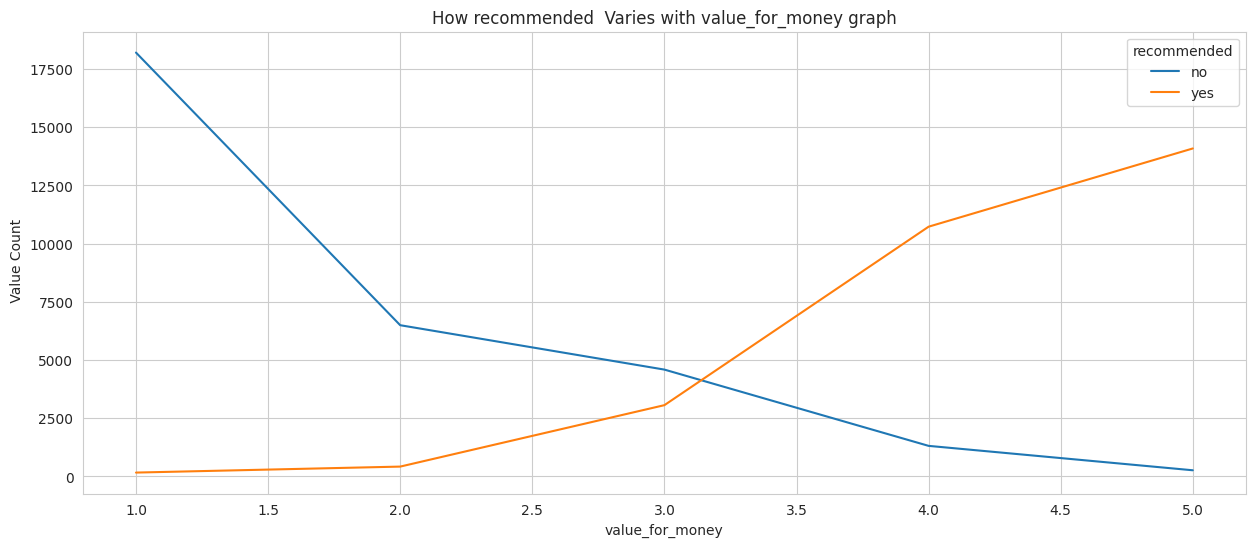

recommended


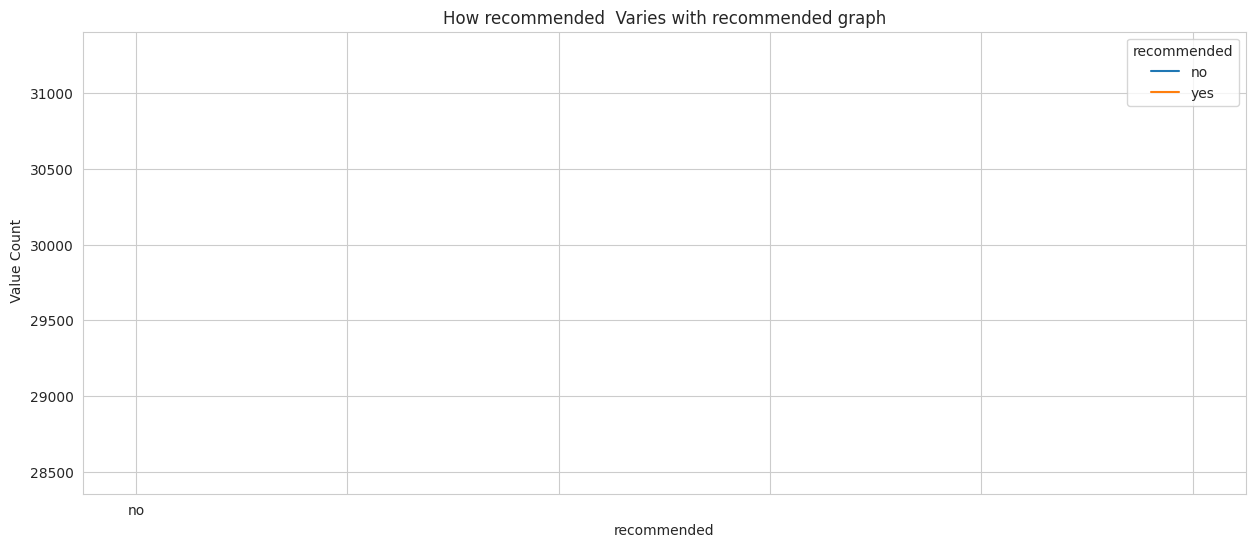

Year


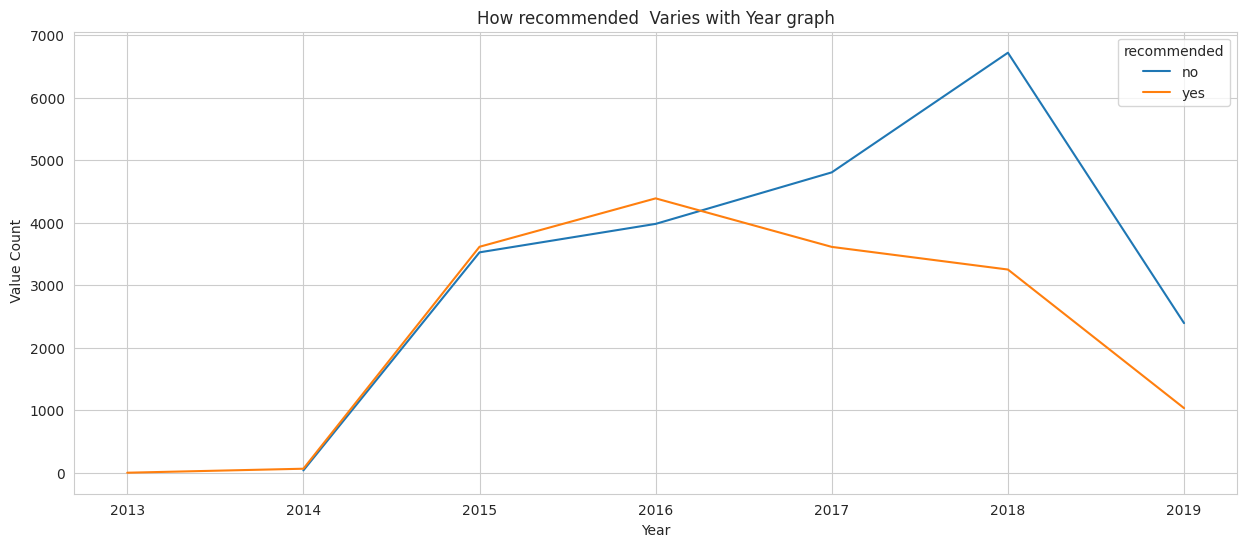

Month


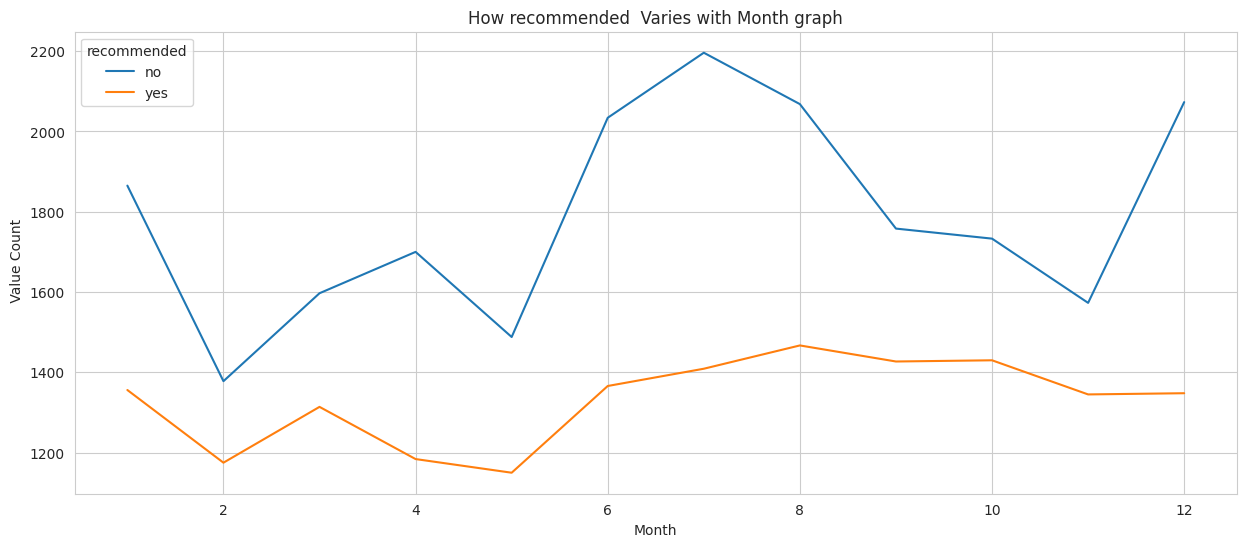

Day


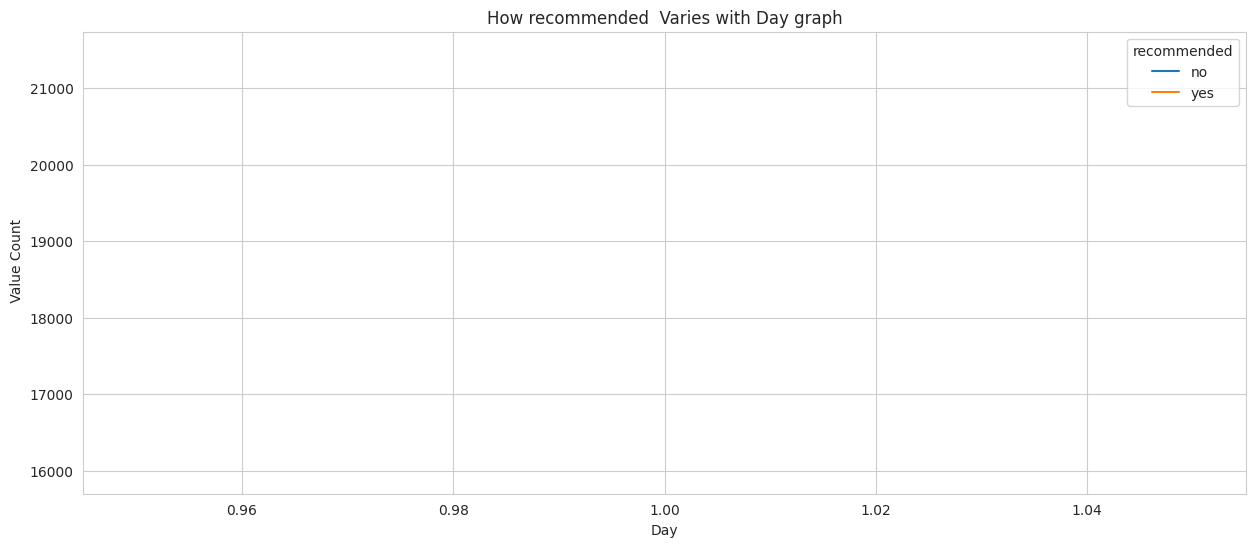

In [43]:
#Ploting line graph of count of feature grouped by target variable to analyze the trend
for feature in features_1:
  print(feature)
  df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1. In Traveller type we can see that both the recommendation trend as of yes or no increases from business to couple leisure and decreases to family then again increases high in solo leisure. Which indicate people prefer solo leisure higher than any of the other leisures.
2. In Cabin type we can see that both the recommendation trend as of yes or no increases from business to Economy class and decreases to First class then again increases slightly in Premium class. Which indicate most people travel on economy class.
3. In month we cannot see any preferable trend but here we can conclude people tent to travel highest during the month of July.
4. In overall rating we can experience a very good insights which is also regular. We can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases.
5. In seat comfort we can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in seat comfort rating 3.0 where we can see similar positive and negative recommendation.
6. In cabin service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in cabin service rating 3.5 where we can see similar positive and negative recommendation.
7. In food service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in food service rating close to 3.0 where we can see similar positive and negative recommendation.
8. In Entertainment service too we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Entertainment service rating between 2.5 and 3.0 where we can see similar positive and negative recommendation.
9. In Ground service also we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Ground service rating close 3.0 where 10. we can see similar positive and negative recommendation.
Lastly in Value for money rating we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Value for money rating greater than 3.0 where we can see similar positive and negative recommendation.

#### Chart - 16

In [44]:
# storing all numerical feature in numeric_feature variable
numeric_features=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']

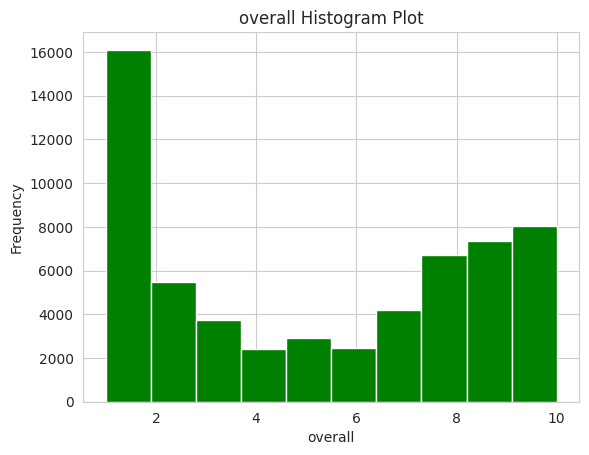

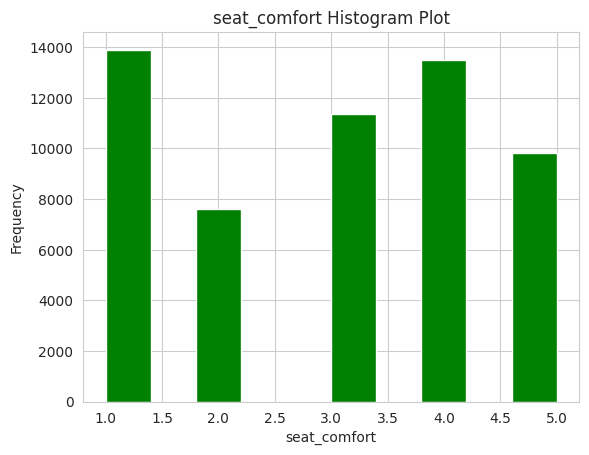

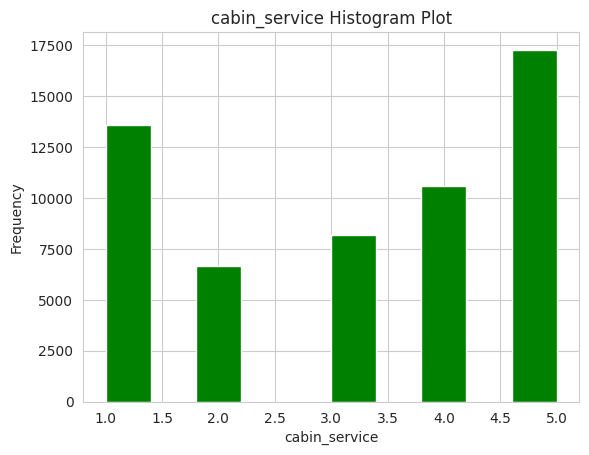

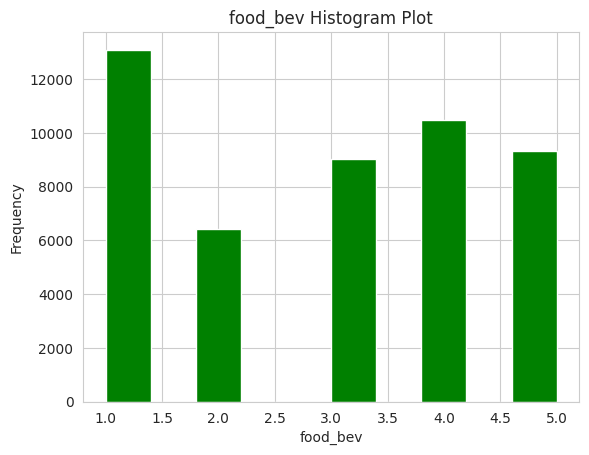

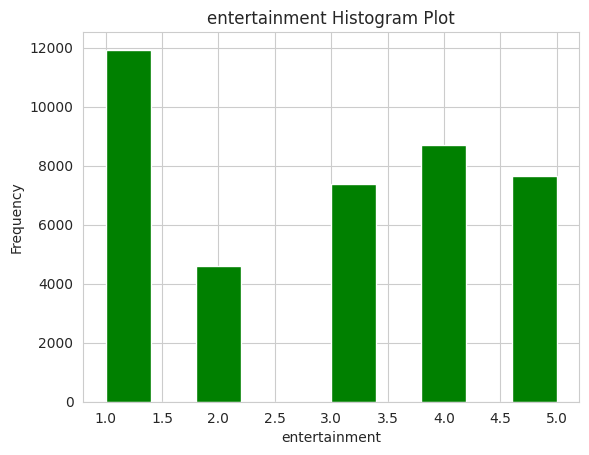

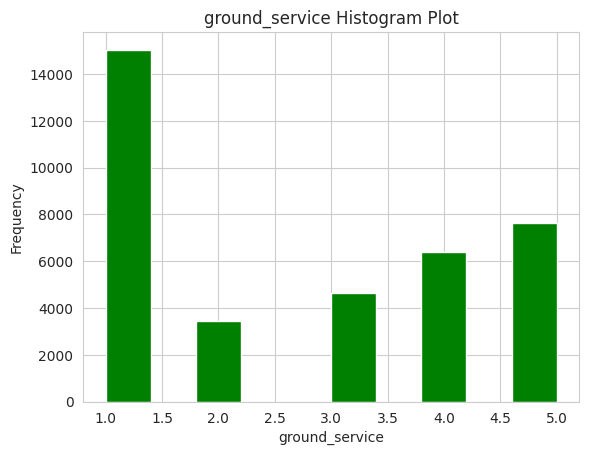

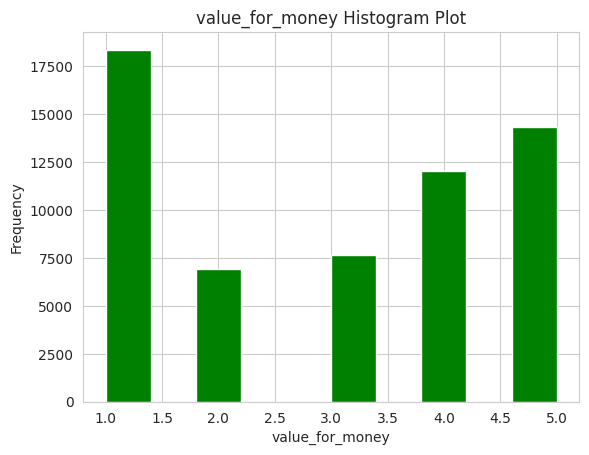

In [45]:
# plotting histogram for all numeric feature 
for i in numeric_features:
  plt.hist(df[i], bins=10,color='green')
  plt.title(i+" Histogram Plot")
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()
  print("")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From Above Plot 
From above plot

1. In comparison to other ratings, the overall feature ratings of 1 to 2 occur more frequently. Passengers are dissatisfied with service facilities such as food beverage, seat comfort, cabin service, and so on... As a result, passengers offer the worst overall ratings.

2. From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.

3. The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

4. From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

5. The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

6. From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

In [46]:
#checking the  null value if exist
df.recommended.isna().sum()

1423

In [47]:
df.head(15)


airline  overall      review_date  traveller_type  \
0                NaN      NaN              NaN             NaN   
1   Turkish Airlines      7.0     8th May 2019        Business   
3   Turkish Airlines      2.0     7th May 2019  Family Leisure   
5   Turkish Airlines      3.0     7th May 2019        Business   
7   Turkish Airlines     10.0     6th May 2019    Solo Leisure   
9   Turkish Airlines      1.0     6th May 2019    Solo Leisure   
11  Turkish Airlines      2.0     5th May 2019  Couple Leisure   
13  Turkish Airlines      1.0     2nd May 2019        Business   
15  Turkish Airlines      2.0  29th April 2019    Solo Leisure   
17  Turkish Airlines      6.0  29th April 2019    Solo Leisure   
19  Turkish Airlines      1.0  28th April 2019    Solo Leisure   
21  Turkish Airlines      1.0  26th April 2019        Business   
23  Turkish Airlines      1.0  25th April 2019  Family Leisure   
25  Turkish Airlines      1.0  25th April 2019        Business   
27  Turkish Airlines      1.0  25th April 2019  Family Leisure   

             cabin date_flown  seat_comfort  cabin_service  food_bev  \
0              NaN        NaT           NaN            NaN       NaN   
1    Economy Class 2019-05-01           4.0            5.0       4.0   
3    Economy Class 2019-05-01           4.0            1.0       1.0   
5    Economy Class 2019-05-01           1.0            4.0       1.0   
7    Economy Class 2019-04-01           4.0            5.0       5.0   
9    Economy Class 2019-05-01           1.0            1.0       1.0   
11   Economy Class 2019-05-01           3.0            3.0       5.0   
13  Business Class 2019-04-01           2.0            2.0       NaN   
15   Economy Class 2019-04-01           3.0            3.0       2.0   
17   Economy Class 2019-04-01           2.0            3.0       3.0   
19   Economy Class 2019-02-01           1.0            1.0       1.0   
21   Economy Class 2019-04-01           1.0            1.0       NaN   
23   Economy Class 2018-10-01           4.0            4.0       4.0   
25   Economy Class 2019-03-01           4.0            4.0       4.0   
27   Economy Class 2019-04-01           2.0            5.0       4.0   

    entertainment  ground_service  value_for_money recommended    Year  Month  \
0             NaN             NaN              NaN         NaN     NaN    NaN   
1             4.0             2.0              4.0         yes  2019.0    5.0   
3             1.0             1.0              1.0          no  2019.0    5.0   
5             3.0             1.0              2.0          no  2019.0    5.0   
7             5.0             5.0              5.0         yes  2019.0    4.0   
9             1.0             1.0              1.0          no  2019.0    5.0   
11            3.0             1.0              1.0          no  2019.0    5.0   
13            3.0             1.0              1.0          no  2019.0    4.0   
15            3.0             1.0              2.0          no  2019.0    4.0   
17            3.0             3.0              3.0         yes  2019.0    4.0   
19            1.0             1.0              1.0          no  2019.0    2.0   
21            NaN             1.0              1.0          no  2019.0    4.0   
23            3.0             1.0              1.0          no  2018.0   10.0   
25            NaN             1.0              1.0          no  2019.0    3.0   
27            4.0             2.0              3.0          no  2019.0    4.0   

    Day  
0   NaN  
1   1.0  
3   1.0  
5   1.0  
7   1.0  
9   1.0  
11  1.0  
13  1.0  
15  1.0  
17  1.0  
19  1.0  
21  1.0  
23  1.0  
25  1.0  
27  1.0

In [48]:
df = df[df['recommended'].notna()]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 1 to 131894
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          59761 non-null  object        
 1   overall          57997 non-null  float64       
 2   review_date      59761 non-null  object        
 3   traveller_type   37539 non-null  object        
 4   cabin            58704 non-null  object        
 5   date_flown       37434 non-null  datetime64[ns]
 6   seat_comfort     56211 non-null  float64       
 7   cabin_service    56240 non-null  float64       
 8   food_bev         48341 non-null  float64       
 9   entertainment    40230 non-null  float64       
 10  ground_service   37169 non-null  float64       
 11  value_for_money  59327 non-null  float64       
 12  recommended      59761 non-null  object        
 13  Year             37434 non-null  float64       
 14  Month            37434 non-null  floa

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value Imputation
# Dropping all rows which has NaN values in recommended columns
df.dropna(subset=['recommended'],inplace=True)

In [51]:
# Dropping these columns because it can introduce bias and affect the performance of the model
df.drop(columns=['airline','date_flown','review_date','Year','Month','Day'],axis=1,inplace=True)

In [52]:
df['traveller_type'].fillna(method="ffill",inplace=True)
df['cabin'].fillna(method="ffill",inplace=True)

In [53]:
from sklearn.impute import KNNImputer

missing_cols = ['overall', 'seat_comfort', 'cabin_service','food_bev','entertainment','ground_service','value_for_money']
imputer = KNNImputer(n_neighbors=5)
df[missing_cols] = imputer.fit_transform(df[missing_cols])

In [54]:
df.isnull().sum()

overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [55]:
df.head()

overall  traveller_type          cabin  seat_comfort  cabin_service  \
1      7.0        Business  Economy Class           4.0            5.0   
3      2.0  Family Leisure  Economy Class           4.0            1.0   
5      3.0        Business  Economy Class           1.0            4.0   
7     10.0    Solo Leisure  Economy Class           4.0            5.0   
9      1.0    Solo Leisure  Economy Class           1.0            1.0   

   food_bev  entertainment  ground_service  value_for_money recommended  
1       4.0            4.0             2.0              4.0         yes  
3       1.0            1.0             1.0              1.0          no  
5       1.0            3.0             1.0              2.0          no  
7       5.0            5.0             5.0              5.0         yes  
9       1.0            1.0             1.0              1.0          no

In [56]:
df.shape

(59761, 10)

In [57]:
# Check the correlation plot

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 1 to 131894
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          59761 non-null  float64
 1   traveller_type   59761 non-null  object 
 2   cabin            59761 non-null  object 
 3   seat_comfort     59761 non-null  float64
 4   cabin_service    59761 non-null  float64
 5   food_bev         59761 non-null  float64
 6   entertainment    59761 non-null  float64
 7   ground_service   59761 non-null  float64
 8   value_for_money  59761 non-null  float64
 9   recommended      59761 non-null  object 
dtypes: float64(7), object(3)
memory usage: 5.0+ MB


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Remove Multicolinearity variables

In [59]:
# Remove Multicolinearity variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['traveller_type', 'cabin','recommended'])

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [60]:
print(vif)

          Features  VIF Score
0          overall  20.956718
1     seat_comfort  15.084082
2    cabin_service  16.482126
3         food_bev  16.953086
4    entertainment  12.326313
5   ground_service  18.707425
6  value_for_money  22.893413


##### 

Answer Here.

#### **One Hot encoding for categorical features**


In [61]:
# categoriacal features to do one hot encoding
categorical_columns =['airline','cabin','traveller_type']


In [62]:
dummy= pd.get_dummies(df,drop_first = False)

In [63]:
dummy.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'traveller_type_Business',
       'traveller_type_Couple Leisure', 'traveller_type_Family Leisure',
       'traveller_type_Solo Leisure', 'cabin_Business Class',
       'cabin_Economy Class', 'cabin_First Class', 'cabin_Premium Economy',
       'recommended_no', 'recommended_yes'],
      dtype='object')

#### **Splitting the Data to Train and Test**

In [70]:
# Import libraries
from sklearn.model_selection import train_test_split

In [76]:
#getting the independent variables
X = dummy.drop

#getting the dependent variables
y= dummy

In [97]:
data=df.copy()

In [100]:
data.head()

overall  seat_comfort  cabin_service  food_bev  entertainment  \
1      7.0           4.0            5.0       4.0            4.0   
3      2.0           4.0            1.0       1.0            1.0   
5      3.0           1.0            4.0       1.0            3.0   
7     10.0           4.0            5.0       5.0            5.0   
9      1.0           1.0            1.0       1.0            1.0   

   ground_service  value_for_money  recommended  TT_Solo_Leisure  \
1             2.0              4.0            1                0   
3             1.0              1.0            0                0   
5             1.0              2.0            0                0   
7             5.0              5.0            1                1   
9             1.0              1.0            0                1   

   TT_Couple_Leisure  TT_Business  TT_Family_Leisure  C_Economy Class  \
1                  0            1                  0                1   
3                  0            0                  1                1   
5                  0            1                  0                1   
7                  0            0                  0                1   
9                  0            0                  0                1   

   C_Business Class  C_Premium Economy  C_First Class  
1                 0                  0              0  
3                 0                  0              0  
5                 0                  0              0  
7                 0                  0              0  
9                 0                  0              0

In [101]:
X=data.drop('recommended',axis=1)
Y=data['recommended']

In [102]:
X

overall  seat_comfort  cabin_service  food_bev  entertainment  \
1        7.000000      4.000000       5.000000  4.000000       4.000000   
3        2.000000      4.000000       1.000000  1.000000       1.000000   
5        3.000000      1.000000       4.000000  1.000000       3.000000   
7       10.000000      4.000000       5.000000  5.000000       5.000000   
9        1.000000      1.000000       1.000000  1.000000       1.000000   
...           ...           ...            ...       ...            ...   
131886   5.169319      2.959278       3.200231  2.926956       2.887994   
131888   5.169319      2.959278       3.200231  2.926956       2.887994   
131890   5.169319      2.959278       3.200231  2.926956       2.887994   
131892   5.169319      2.959278       3.200231  2.926956       2.887994   
131894   5.169319      2.959278       3.200231  2.926956       2.887994   

        ground_service  value_for_money  TT_Solo_Leisure  TT_Couple_Leisure  \
1             2.000000         4.000000                0                  0   
3             1.000000         1.000000                0                  0   
5             1.000000         2.000000                0                  0   
7             5.000000         5.000000                1                  0   
9             1.000000         1.000000                1                  0   
...                ...              ...              ...                ...   
131886        2.681347         2.950849                0                  1   
131888        2.681347         2.950849                0                  1   
131890        2.681347         2.950849                0                  1   
131892        2.681347         2.950849                0                  1   
131894        2.681347         2.950849                0                  1   

        TT_Business  TT_Family_Leisure  C_Economy Class  C_Business Class  \
1                 1                  0                1                 0   
3                 0                  1                1                 0   
5                 1                  0                1                 0   
7                 0                  0                1                 0   
9                 0                  0                1                 0   
...             ...                ...              ...               ...   
131886            0                  0                1                 0   
131888            0                  0                1                 0   
131890            0                  0                1                 0   
131892            0                  0                1                 0   
131894            0                  0                1                 0   

        C_Premium Economy  C_First Class  
1                       0              0  
3                       0              0  
5                       0              0  
7                       0              0  
9                       0              0  
...                   ...            ...  
131886                  0              0  
131888                  0              0  
131890                  0              0  
131892                  0              0  
131894                  0              0  

[59761 rows x 15 columns]

In [103]:
print("The Percentage of No labels of Target Variable is",np.round(Y.value_counts()[0]/len(Y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(Y.value_counts()[1]/len(Y)*100))

The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


In [106]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.2, random_state = 42) 

In [107]:
#shape of x_train and x_test data
print(X_train.shape)
print(X_test.shape)
     

(47808, 15)
(11953, 15)


In [108]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)
     

(47808,)
(11953,)


In [109]:
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
evaluation_metrics_df= pd.DataFrame(columns = column)

#### **Creating Function to store evaluation metrics values**

In [110]:
#creating function for storing evaluation metrices
def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df= metric_df.append({'Model': model,
                               'Accuracy':accuracy_score(y_test,pred_value),
                               'Recall':recall_score(y_test,pred_value),
                               'Precision':precision_score(y_test,pred_value),
                               'f1-score':f1_score(y_test,pred_value),
                               'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

### 3. Categorical Encoding

In [111]:
# Encode your categorical columns
# Create dummy variables for the catgeorical variable State of traveller_type
df['TT_Solo_Leisure'] = np.where(df['traveller_type']=='Solo Leisure', 1, 0)
df['TT_Couple_Leisure'] = np.where(df['traveller_type']=='Couple Leisure', 1, 0)
df['TT_Business'] = np.where(df['traveller_type']=='Business', 1, 0)
df['TT_Family_Leisure'] = np.where(df['traveller_type']=='Family Leisure', 1, 0)

# Drop the original column State from the dataframe
df.drop(columns=['traveller_type'],axis=1,inplace=True)

KeyError: ignored

In [112]:
# Create dummy variables for the catgeorical variable State of cabin
df['C_Economy Class'] = np.where(df['cabin']=='Economy Class', 1, 0)
df['C_Business Class'] = np.where(df['cabin']=='Business Class', 1, 0)
df['C_Premium Economy'] = np.where(df['cabin']=='Premium Economy', 1, 0)
df['C_First Class'] = np.where(df['cabin']=='First Class', 1, 0)

# Drop the original column State from the dataframe
df.drop(columns=['cabin'],axis=1,inplace=True)

KeyError: ignored

In [89]:
#converting targeted column
df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [90]:
df.head()

overall  seat_comfort  cabin_service  food_bev  entertainment  \
1      7.0           4.0            5.0       4.0            4.0   
3      2.0           4.0            1.0       1.0            1.0   
5      3.0           1.0            4.0       1.0            3.0   
7     10.0           4.0            5.0       5.0            5.0   
9      1.0           1.0            1.0       1.0            1.0   

   ground_service  value_for_money  recommended  TT_Solo_Leisure  \
1             2.0              4.0            1                0   
3             1.0              1.0            0                0   
5             1.0              2.0            0                0   
7             5.0              5.0            1                1   
9             1.0              1.0            0                1   

   TT_Couple_Leisure  TT_Business  TT_Family_Leisure  C_Economy Class  \
1                  0            1                  0                1   
3                  0            0                  1                1   
5                  0            1                  0                1   
7                  0            0                  0                1   
9                  0            0                  0                1   

   C_Business Class  C_Premium Economy  C_First Class  
1                 0                  0              0  
3                 0                  0              0  
5                 0                  0              0  
7                 0                  0              0  
9                 0                  0              0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

## ***7. ML Model Implementation***

### **ML Model - 1 Logistic Regression**

In [113]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

# Fit the Algorithm
lr = LogisticRegression()
lr.fit(X_train,y_train)

train_score_1 = lr.score(X_train,y_train)
test_score_1 = lr.score(X_test,y_test)

print("Training Accuracy", train_score_1)
print("Testing Accuracy",test_score_1)

# Predict on the model
y_pred_1 = lr.predict(X_test)

Training Accuracy 0.9580614123159303
Testing Accuracy 0.9519785827825651


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [114]:
# Visualizing evaluation Metric Score chart
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(lr,X_train,y_train,cv=10)
print('Average Accuracy',np.mean(scoreslr))

Average Accuracy 0.9578730531155838


In [115]:
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred_1))

Confusion Matrix 
 [[5927  298]
 [ 276 5452]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.2%



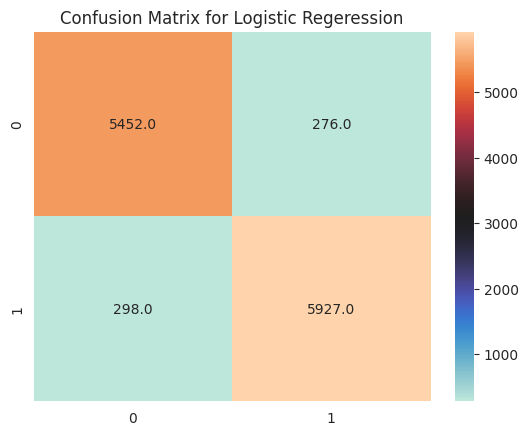

In [116]:
pred_value = lr.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Logistic Regeression')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Logistic Regression',y_test,pred_value,evaluation_metrics_df)

Answer Here 

#### **ML Model 2. Decision Trees**

In [117]:
#Decision Tree
dtc =DecisionTreeClassifier()
dtc.fit(X_train,y_train)
score=dtc.score(X_test,y_test)
print(f'Decision Tree score : {score}')
     

Decision Tree score : 0.9323182464653225


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6225
           1       0.93      0.93      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953


Accuracy score % of the model is 93.23%



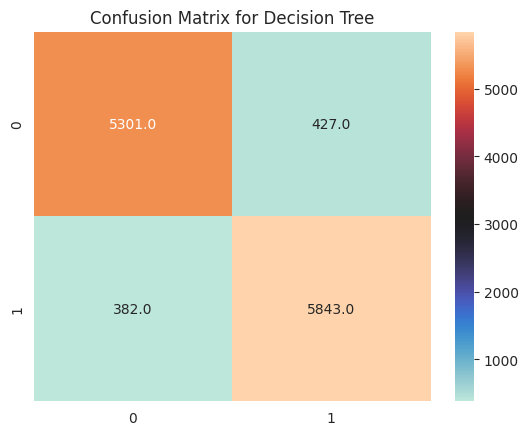

In [118]:
#model evaluation
pred_value = dtc.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Decision Tree')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Decision Tree',y_test,pred_value,evaluation_metrics_df)

#### **ML Model 3. Random Forest**

In [119]:
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
score=rf.score(X_test,y_test)
print(f'Random Forest score : {score}')

Random Forest score : 0.9519785827825651


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.2%



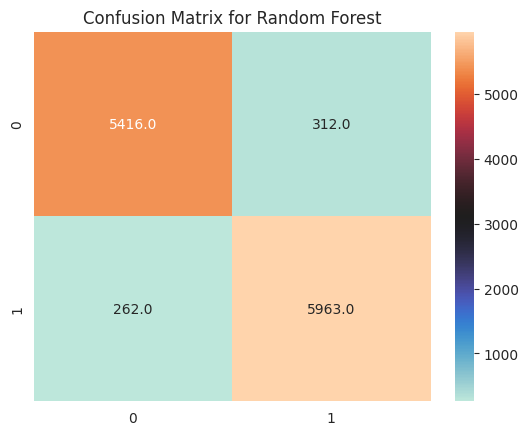

In [120]:
pred_value = rf.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Random Forest',y_test,pred_value,evaluation_metrics_df)
     

#### **Random Forest with GridSearchCV**

In [121]:
#Hyperparametric Tuning to get best parameter for evaluation
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}
     

In [122]:
#uassigning grid search variable
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   3.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   2.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.9s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.9s
[CV] END max_depth=6, min_sa

RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=10)

In [123]:
#getting best parameter from grid search
rf_grid.best_params_
     

{'max_depth': 10,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 100}

In [124]:
#assigning best param variable
rf_grid_best = rf_grid.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.26%



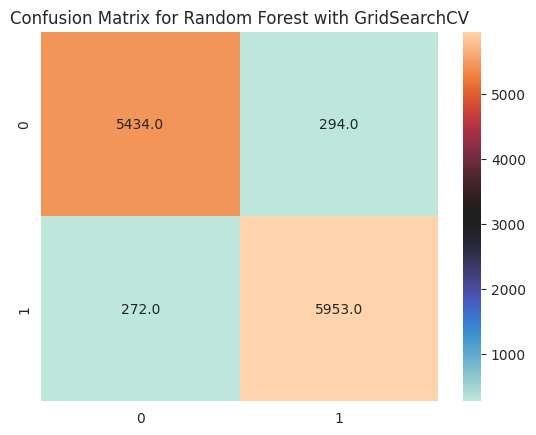

In [125]:
#model evaluation
pred_value = rf_grid_best.predict(X_test)


print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest with GridSearchCV')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Random Forest with GridSearchCV',y_test,pred_value,evaluation_metrics_df)

#### Answer here

#### **ML Model 3. K_nearest Neighbour Model**

In [126]:
#using knn model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'K-nearest-neighbour score : {score}')

K-nearest-neighbour score : 0.9510583117209069


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.11%



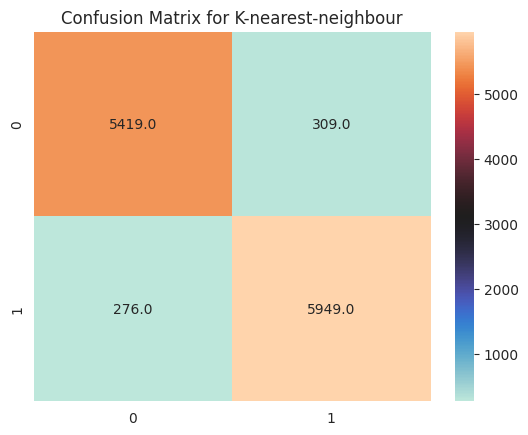

In [127]:
#model evaluation

pred_value = knn.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for K-nearest-neighbour')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('K-nearest-neighbour',y_test,pred_value,evaluation_metrics_df)
     

#### **K_nearest Neighbour Model with GridSearchCV**


In [128]:
#hyperparametric tuning to get best estimator for knn
knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])})

In [129]:
#getting best estimator
knn_grid.best_estimator_
     

KNeighborsClassifier(n_neighbors=42)

In [130]:
#assigining grid variable
knn_grid_best = knn_grid.best_estimator_


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.21%



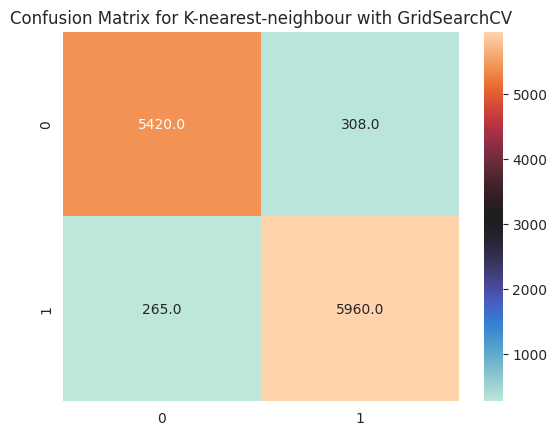

In [131]:
#model evaluation
pred_value = knn_grid_best.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for K-nearest-neighbour with GridSearchCV')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('K-nearest-neighbour with GridSearchCV',y_test,pred_value,evaluation_metrics_df)

Answer Here.

Answer Here.

##**Support Vector Machine**

In [132]:
#supprt vector machine using kernel as linear
svc= SVC(kernel = 'linear')
svc.fit(X_train,y_train)
score=svc.score(X_test,y_test)
print(f'SVM score : {score}')

SVM score : 0.9524805488161968


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.25%



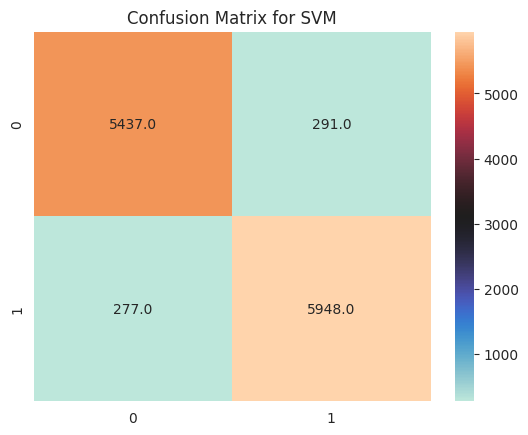

In [133]:
#model evaluation
pred_value = svc.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for SVM')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('SVM',y_test,pred_value,evaluation_metrics_df)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [136]:
import xgboost as xgb

#xgboost model
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
score=xgb_model.score(X_test,y_test)
print(f'XGBoost score : {score}')

XGBoost score : 0.9539027859114867


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6225
           1       0.96      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.39%



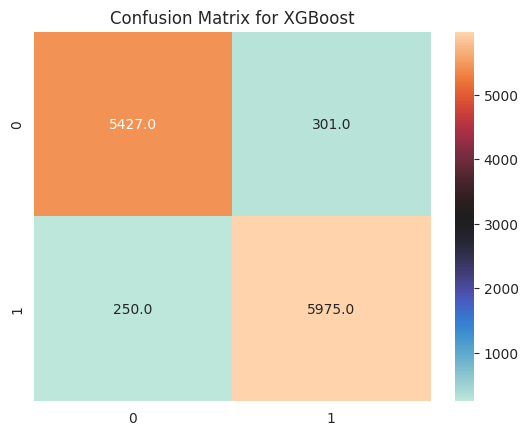

In [137]:
#model evaluation
pred_value = xgb_model.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for XGBoost')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('XGBoost',y_test,pred_value,evaluation_metrics_df)

##**Different Model Comparison according to their Evaluation metrices**

In [138]:
#getting evaluation metrices
evaluation_metrics_df

Model  Accuracy    Recall  Precision  \
0                    Logistic Regression  0.951979  0.951816   0.948174   
1                          Decision Tree  0.932318  0.925454   0.932782   
2                          Random Forest  0.951979  0.945531   0.953857   
3        Random Forest with GridSearchCV  0.952648  0.948673   0.952331   
4                    K-nearest-neighbour  0.951058  0.946054   0.951536   
5  K-nearest-neighbour with GridSearchCV  0.952062  0.946229   0.953386   
6                                    SVM  0.952481  0.949197   0.951523   
7                                XGBoost  0.953903  0.947451   0.955963   

   f1-score  roc_auc_score  
0  0.949991       0.951972  
1  0.929103       0.932044  
2  0.949676       0.951721  
3  0.950499       0.952489  
4  0.948788       0.950859  
5  0.949794       0.951829  
6  0.950358       0.952349  
7  0.951688       0.953645

In [139]:
#reseting index so to have all the model's evaluation metrices starting from 0
evaluation_metrics_df.sort_values('Accuracy',ascending=False)
evaluation_metrics_df=evaluation_metrics_df.reset_index(drop=True)
evaluation_metrics_df

Model  Accuracy    Recall  Precision  \
0                    Logistic Regression  0.951979  0.951816   0.948174   
1                          Decision Tree  0.932318  0.925454   0.932782   
2                          Random Forest  0.951979  0.945531   0.953857   
3        Random Forest with GridSearchCV  0.952648  0.948673   0.952331   
4                    K-nearest-neighbour  0.951058  0.946054   0.951536   
5  K-nearest-neighbour with GridSearchCV  0.952062  0.946229   0.953386   
6                                    SVM  0.952481  0.949197   0.951523   
7                                XGBoost  0.953903  0.947451   0.955963   

   f1-score  roc_auc_score  
0  0.949991       0.951972  
1  0.929103       0.932044  
2  0.949676       0.951721  
3  0.950499       0.952489  
4  0.948788       0.950859  
5  0.949794       0.951829  
6  0.950358       0.952349  
7  0.951688       0.953645

Answer Here : Here we can see that Random Forest and XGBoost Model is having the same high Model Accuracy with a score 0.957082 but we can also see that recall, precision, f1-score and roc_auc_score of XGBoost model combined is giving higher score than Random Forest from which we have chosen XGBoost Model for further prediction.


#**Model explainability**
##**SHAP(SHapley Additive exPlanations)**

**SHAP Interpretation**
* **Base value**: This is the average feature value. This value is used to determine if the prediction is whether true or false.
* **Red color Block**: This represent the feature for which the prediction is positive. Higher this value will pushes the prediction positively.
* **Blue color block**: This represent the feature for which the prediction is negative. higher this value will pushes the prediction negatively 
* **Block size**: the block size shows the feature importance. larger the block size larger will the feature importance value.

In [174]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.7 MB/s eta 0:00:00


##**Creating function for getting shape OF tree based model with JS visualization using SHAP in notebook environment**

In [175]:
import shap
# Initialize JavaScript visualizations in notebook environment
def get_shap_js(model):
  shap.initjs()
# Define a tree explainer for the built model
  explainer = shap.TreeExplainer(dtc)
# obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])
  return shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0]) 

##**Creating Function to get SHAP summary**

In [176]:
#creating function to get shap summary in scatter plot
def shap_scatter_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(X_test)
  return shap.summary_plot(shap_values[0], X_test)

In [177]:
#creating function to get shap summary in bar plot
def shap_bar_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(X_test)  
  return shap.summary_plot(shap_values, X_train, plot_type="bar")

In [178]:
X_test.iloc[0]

overall              3.0
seat_comfort         2.0
cabin_service        4.0
food_bev             3.0
entertainment        4.0
ground_service       1.0
value_for_money      1.0
TT_Solo_Leisure      1.0
TT_Couple_Leisure    0.0
TT_Business          0.0
TT_Family_Leisure    0.0
C_Economy Class      1.0
C_Business Class     0.0
C_Premium Economy    0.0
C_First Class        0.0
Name: 27775, dtype: float64

In [179]:
X_test.mean()

overall              5.091722
seat_comfort         2.967401
cabin_service        3.182867
food_bev             2.806749
entertainment        2.759027
ground_service       2.818348
value_for_money      2.959489
TT_Solo_Leisure      0.403664
TT_Couple_Leisure    0.261608
TT_Business          0.168995
TT_Family_Leisure    0.165732
C_Economy Class      0.773613
C_Business Class     0.160127
C_Premium Economy    0.040074
C_First Class        0.026186
dtype: float64

##**Shap Summary for Logistic Regresion**


In [180]:
get_shap_js(lr)

* Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

##**Shap Summary for Decision Tree**

In [181]:
get_shap_js(dtc)

* Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

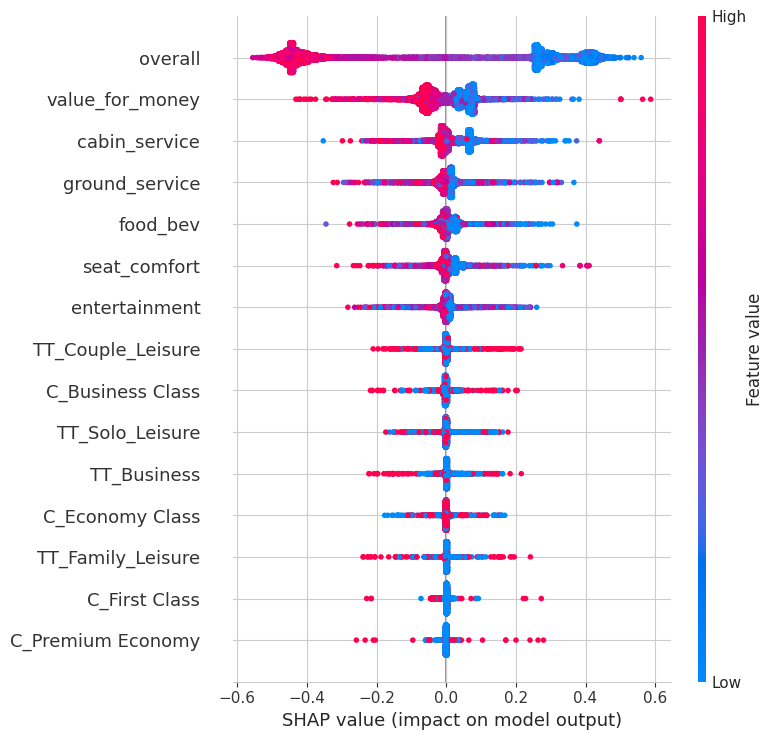

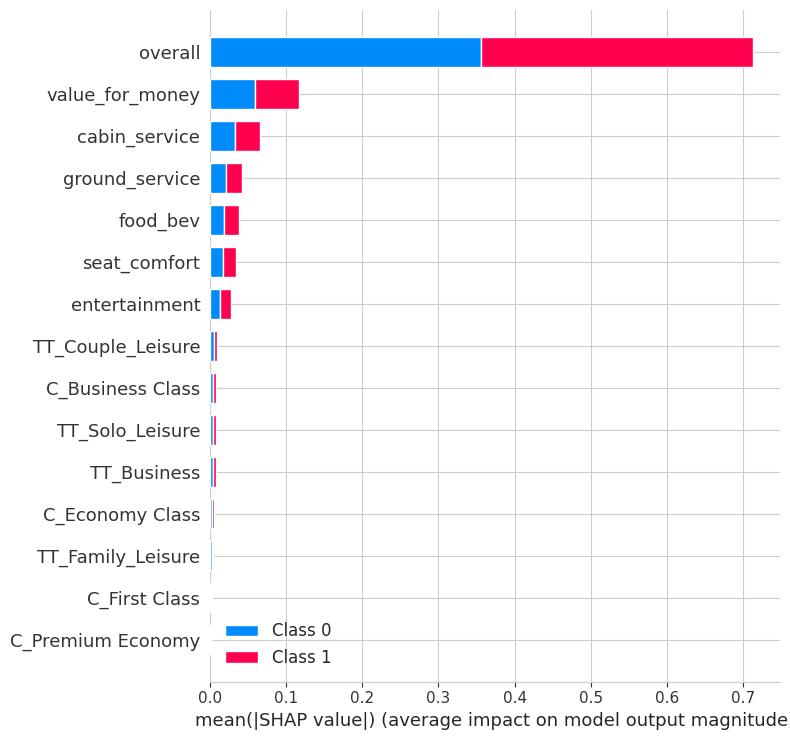

In [182]:
shap_scatter_plot(dtc)
shap_bar_plot(dtc)

Answr Here. Here we can see in scatter plot high overall,value for money,numeric_review,cabin service,ground_service positive features and low airline_British_airways is increasing positive prediction.

##**Shap Summary for SVM**

In [184]:
get_shap_js(svc)

Answer Here. Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

##**Shap Summary for Random Forest**


In [185]:
get_shap_js(rf_grid_best)

Answer Here .  Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

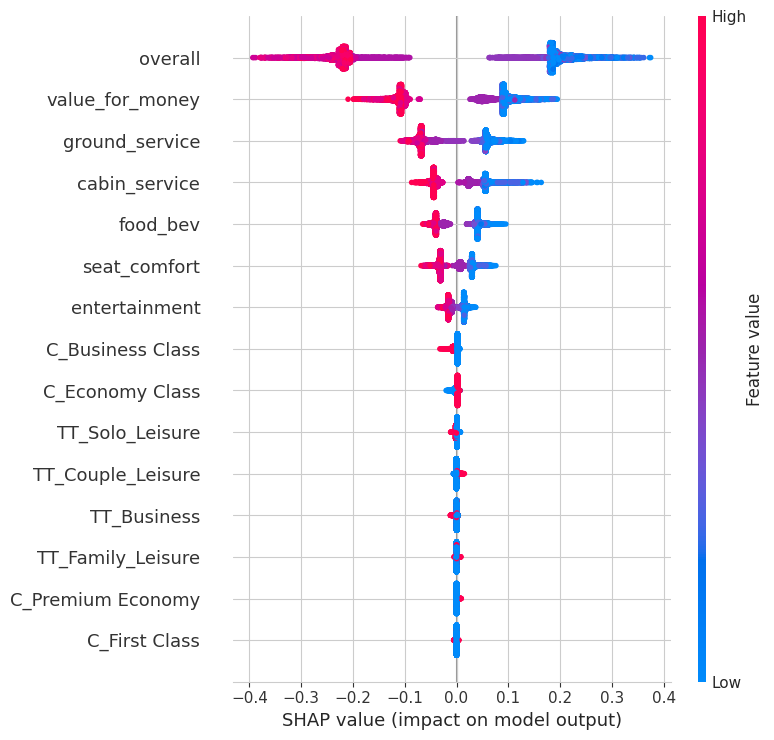

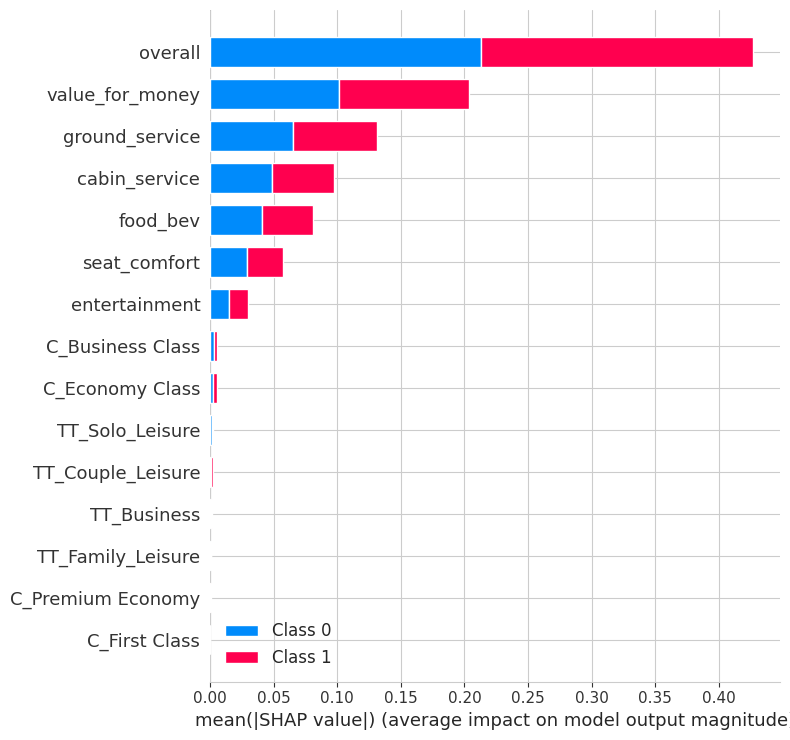

In [186]:
shap_scatter_plot(rf_grid_best)
shap_bar_plot(rf_grid_best)

Answer Here * Here we can see in scatter plot high overall,value for money,numeric_review,cabin service,ground_service positive features and low airline_British_airways is increasing positive prediction.

##**Shap Summary for K-Nearest-Neighbour**

In [187]:
get_shap_js(knn_grid_best)

Answer here. Here we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive prediction.

#### **NLP(Natural Language Processing) for reviews**


In [ ]:
# Install vaderSentiment package
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing SentimentIntensityAnalyzer class

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
  
    #scorring each reviews depending on their polarity
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***